## Get data

In [1]:
import pandas as pd

data_raw = pd.read_csv('decision_tree_train.csv')
test = pd.read_csv('decision_tree_test.csv')

In [3]:
test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
data_raw.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Dataset contains information about **passengers** who were onboard the Titanic when it sank on its maiden voyage in **1912**.

There are two files available: `train.csv` and `test.csv`

The `train.csv` file contains information about **891** passengers, while the `test.csv` file contains information about **418** passengers.

Each row in the dataset represents one passenger, and each column represents a feature or attribute of that passenger.

The features in the dataset include:
* **PassengerId**: Unique ID given to each passenger
* **Survived**: Whether the passenger survived (1) or not (0)
* **Pclass**: Passenger class (1st, 2nd, or 3rd class)
* **Name**: Name of the passenger
* **Sex**: Gender of the passenger
* **Age**: Age of the passenger (in years)
* **SibSp**: Number of siblings/spouses aboard the Titanic
* **Parch**: Number of parents/children aboard the Titanic
* **Ticket**: Ticket number
* **Fare**: Passenger fare
* **Cabin**: Cabin number
* **Embarked**: Port of embarkation:
  * C = Cherbourg, France
  * Q = Queenstown, Ireland
  * S = Southampton, UK
    

The **Survived** column is the target variable.
The remaining features are input variables to train a model.

### Looking for passengers by name

In [9]:
[x for x in data_raw.Name if 'jack' in x.lower()], [x for x in data_raw.Name if 'rose' in x.lower()]

(['Brewe, Dr. Arthur Jackson'],
 ['Hood, Mr. Ambrose Jr', 'Aks, Mrs. Sam (Leah Rosen)'])

## EDA & sweetviz

We will use `sweetviz` libary.  
More info: [sweetviz doc](https://pypi.org/project/sweetviz/) and [colab notebook]( https://colab.research.google.com/drive/1-md6YEwcVGWVnQWTBirQSYQYgdNoeSWg?usp=sharing)


In [11]:
!pip install sweetviz -qq
!echo '[Layout]' > Override.ini
!echo 'show_logo = 0' >> Override.ini

                                             |      | [  0%]   00:00 -> (? left)

Report Basic_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



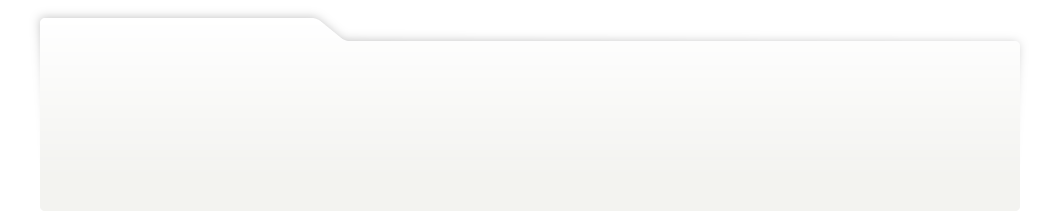
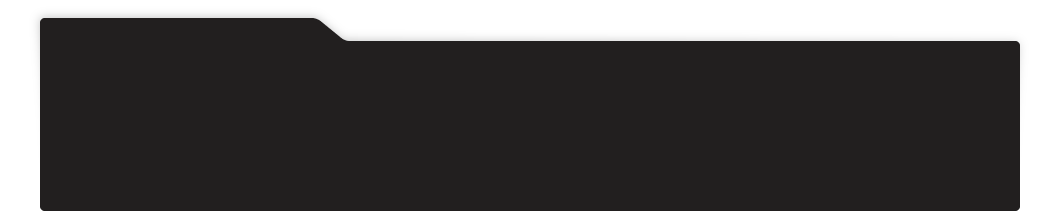
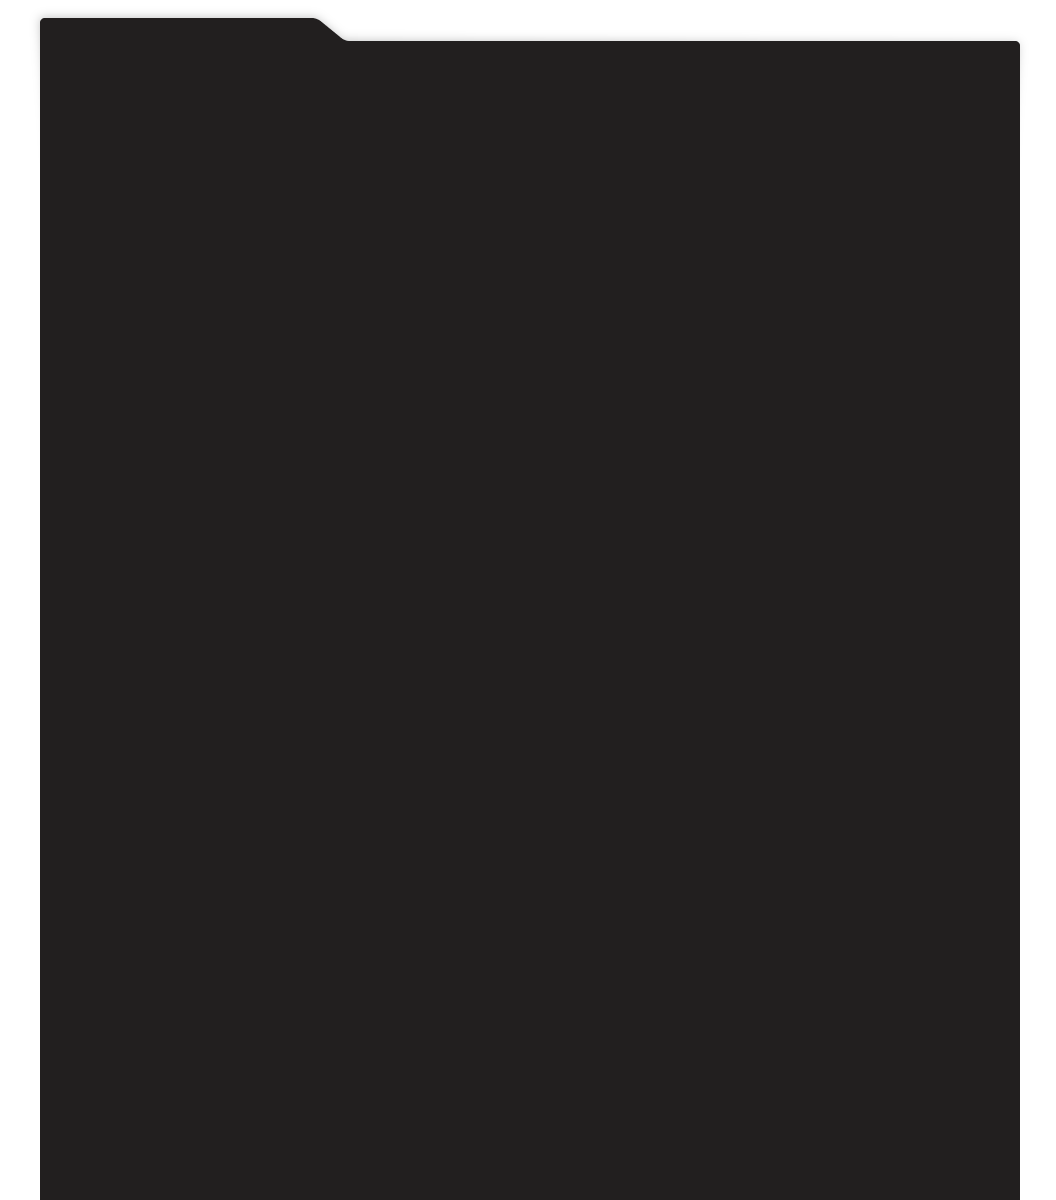
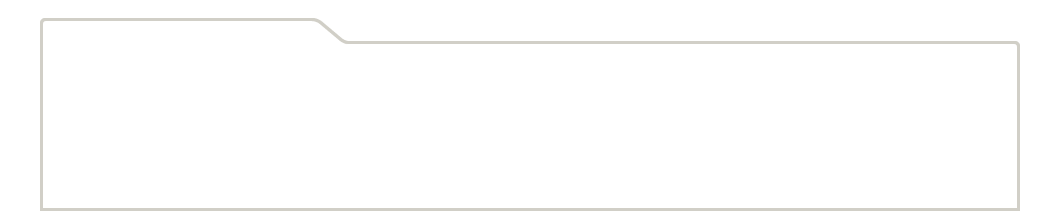
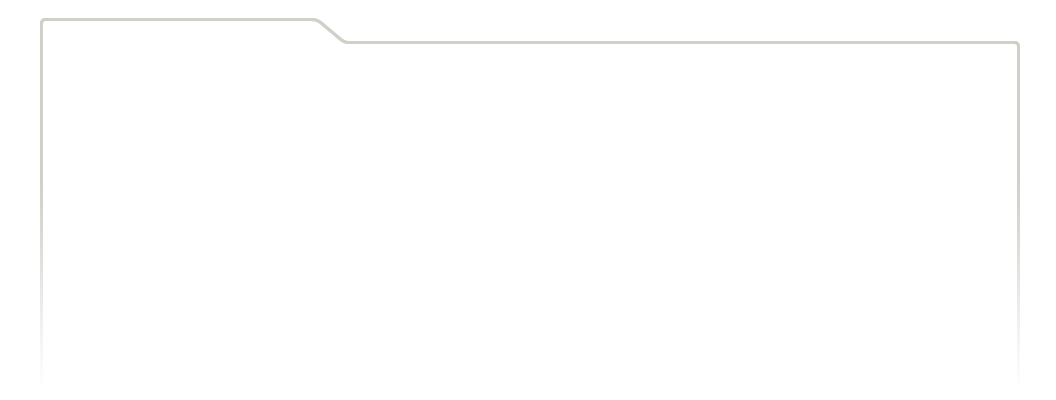
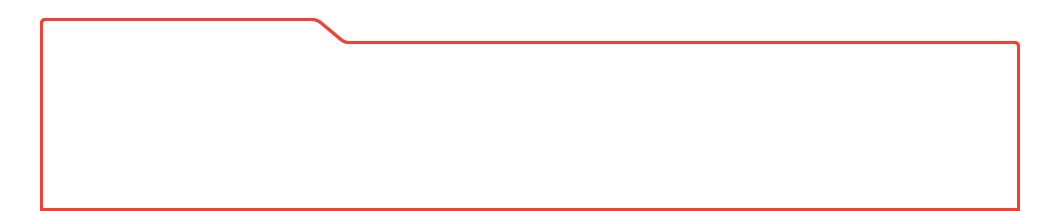
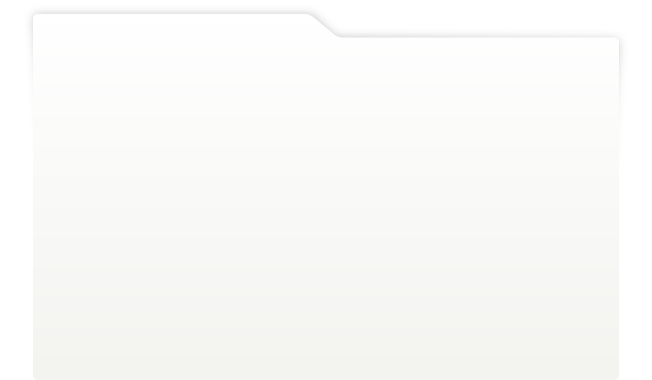
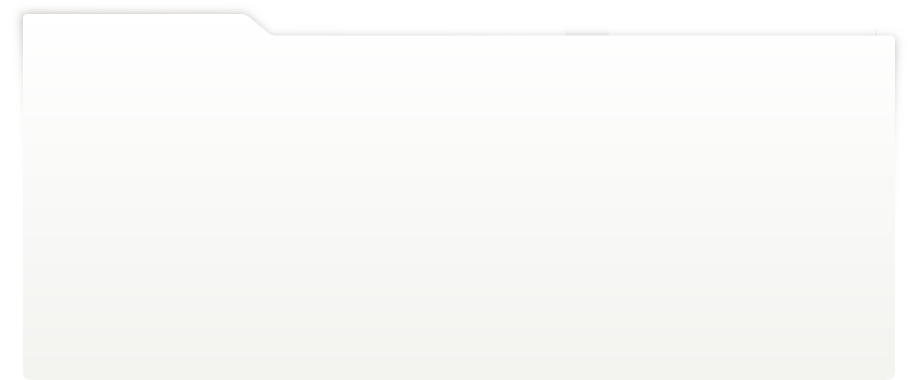
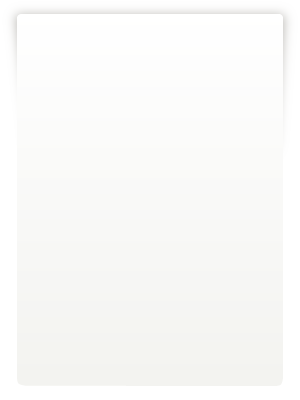
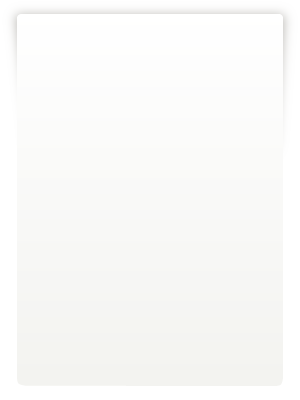
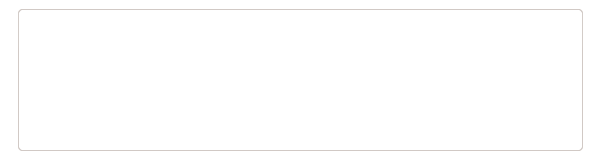
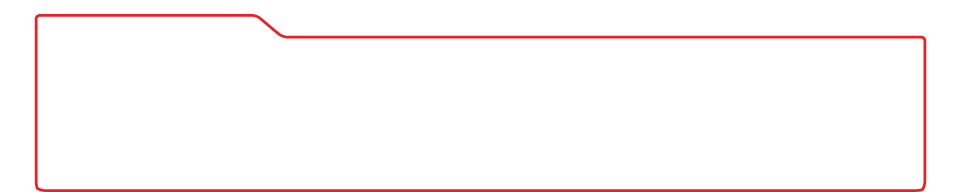
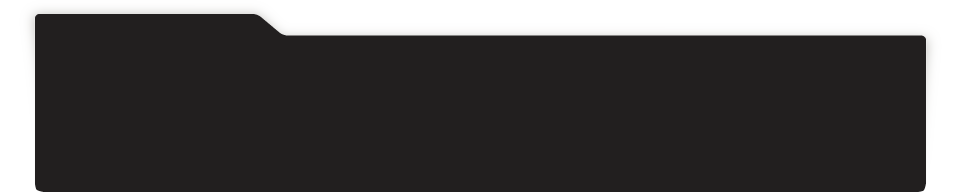
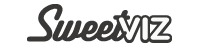
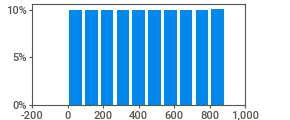
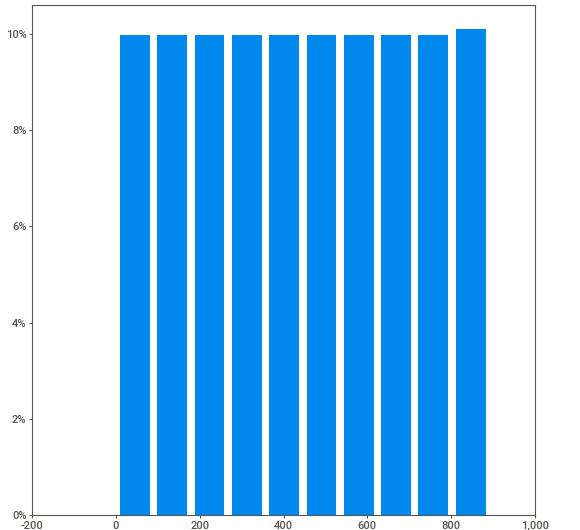
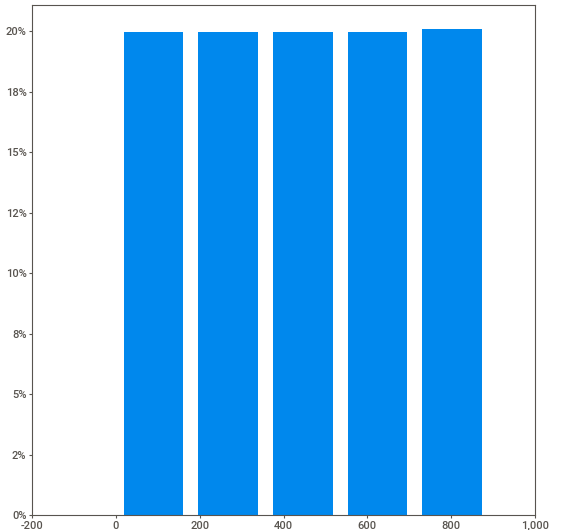
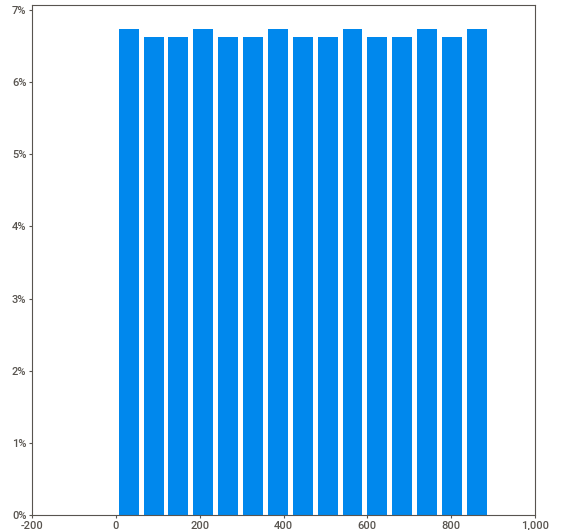
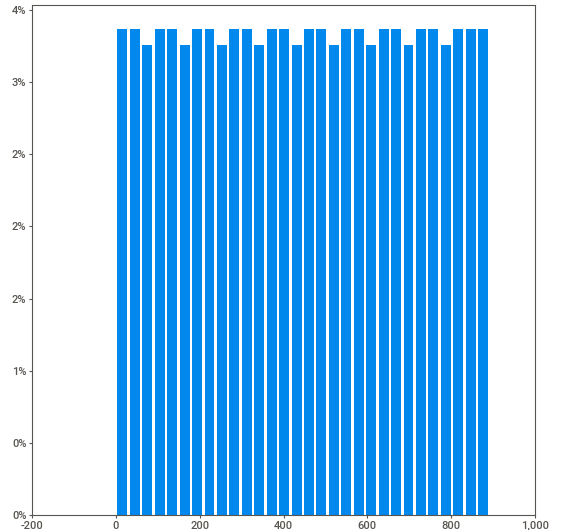
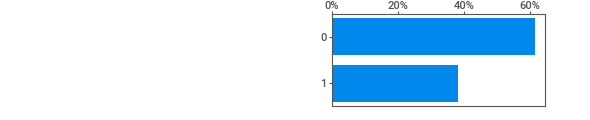
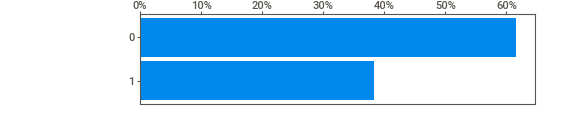
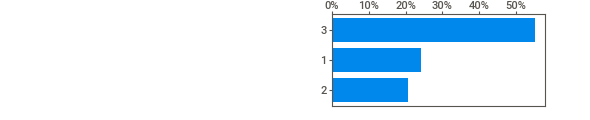
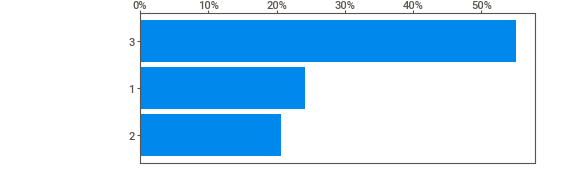
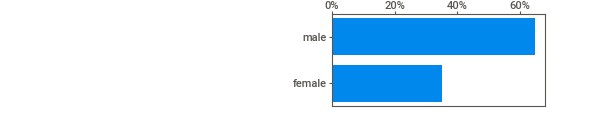
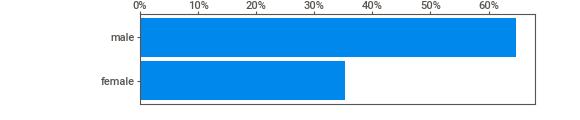
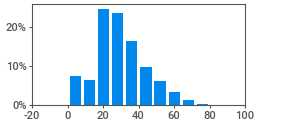
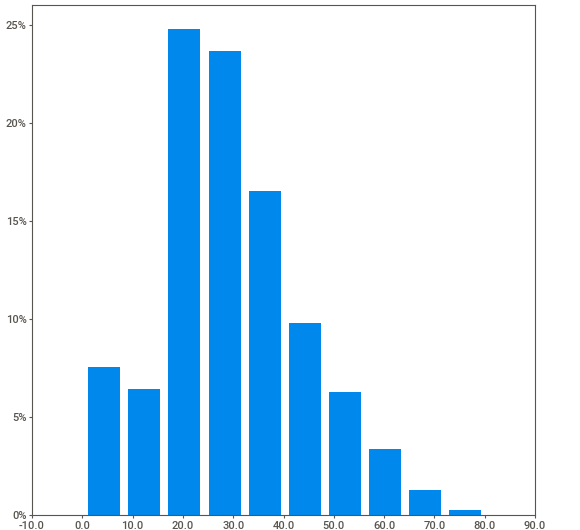
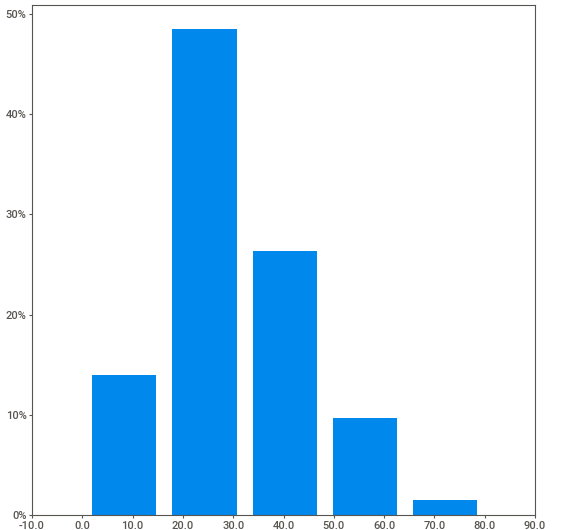
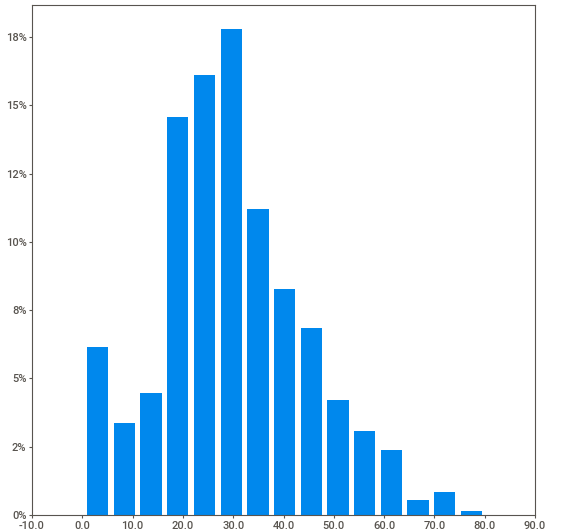
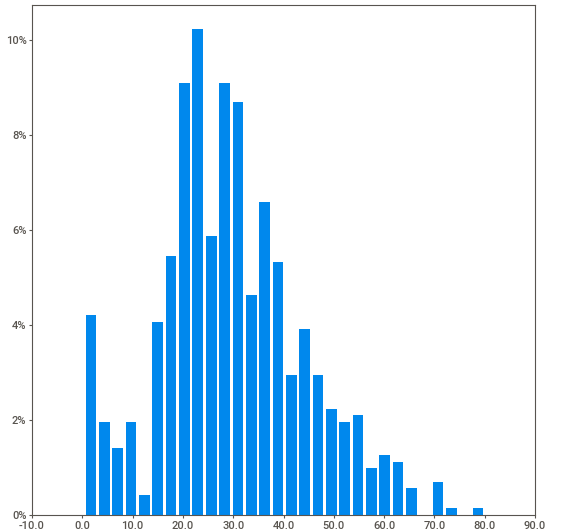
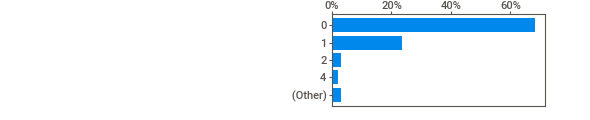
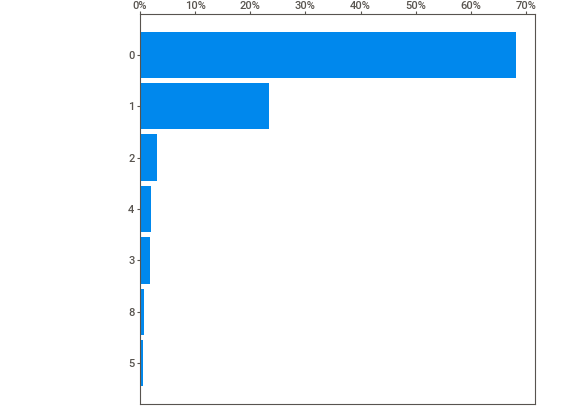
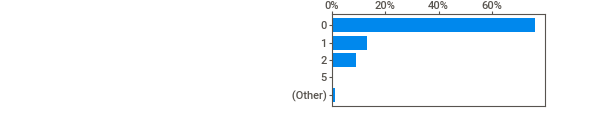
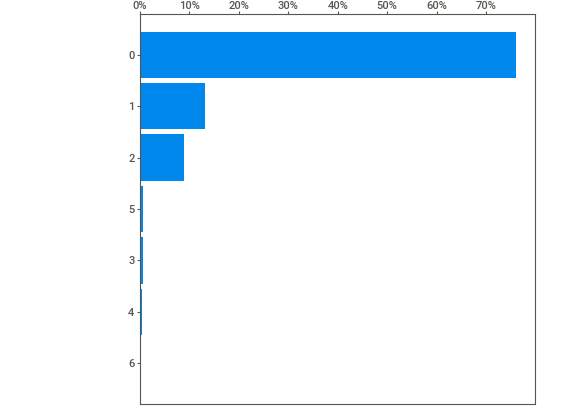
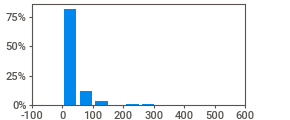
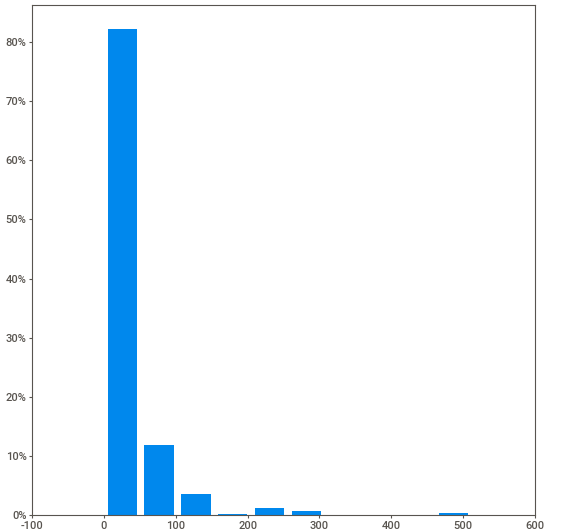
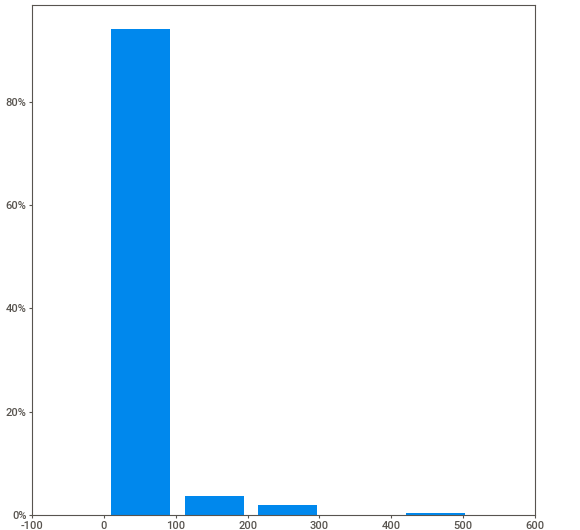
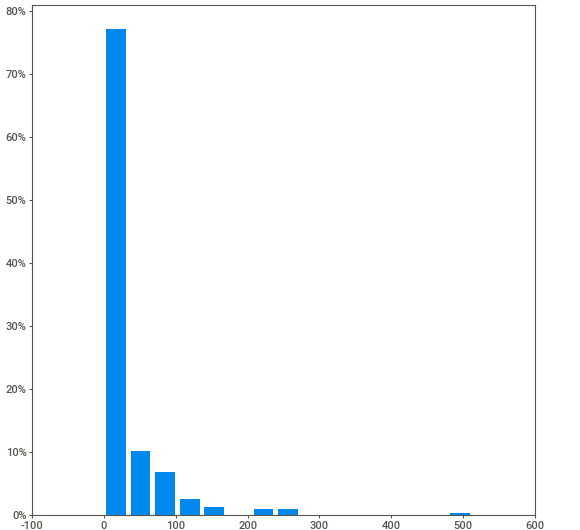
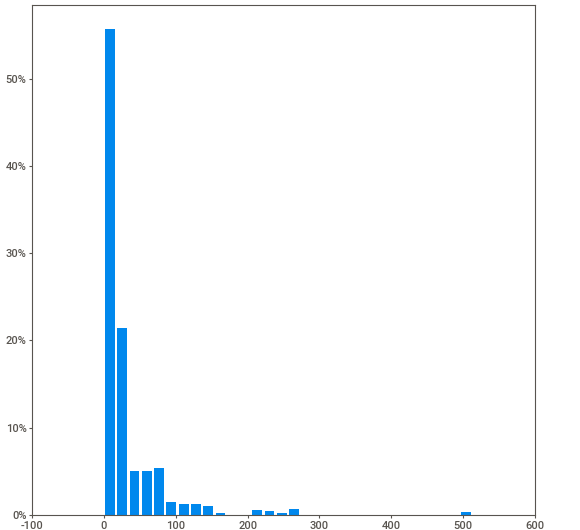
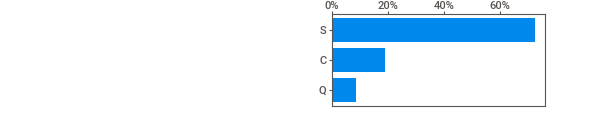
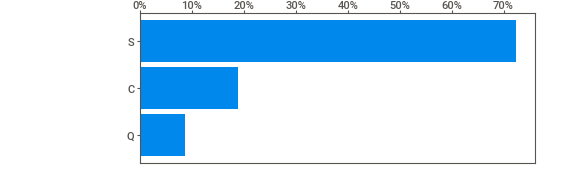
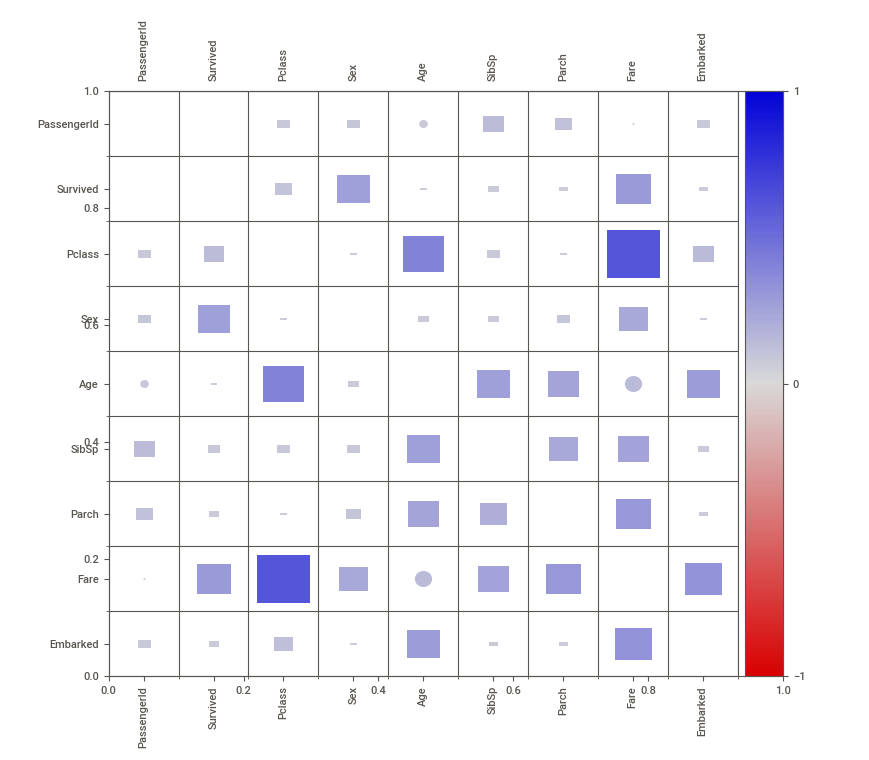
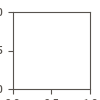

In [13]:
import sweetviz as sv
# sv.config_parser.read("Override.ini")
my_report = sv.analyze(data_raw)
my_report.show_html(filepath='Basic_report.html', layout='vertical', scale=None)
my_report.show_notebook()

                                             |      | [  0%]   00:00 -> (? left)

Report Analyze_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



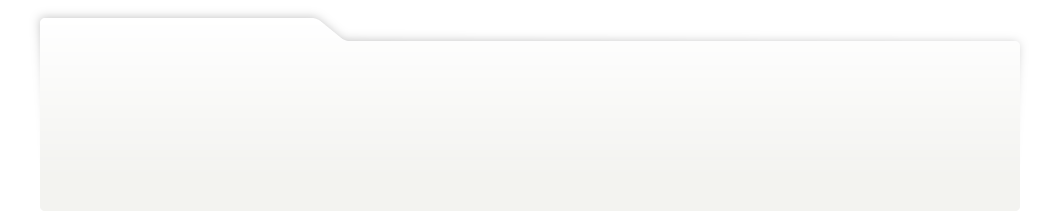
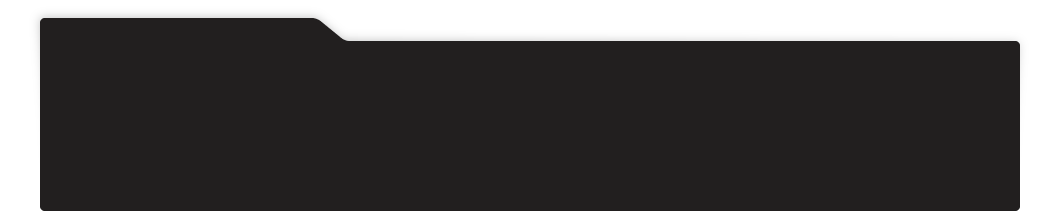
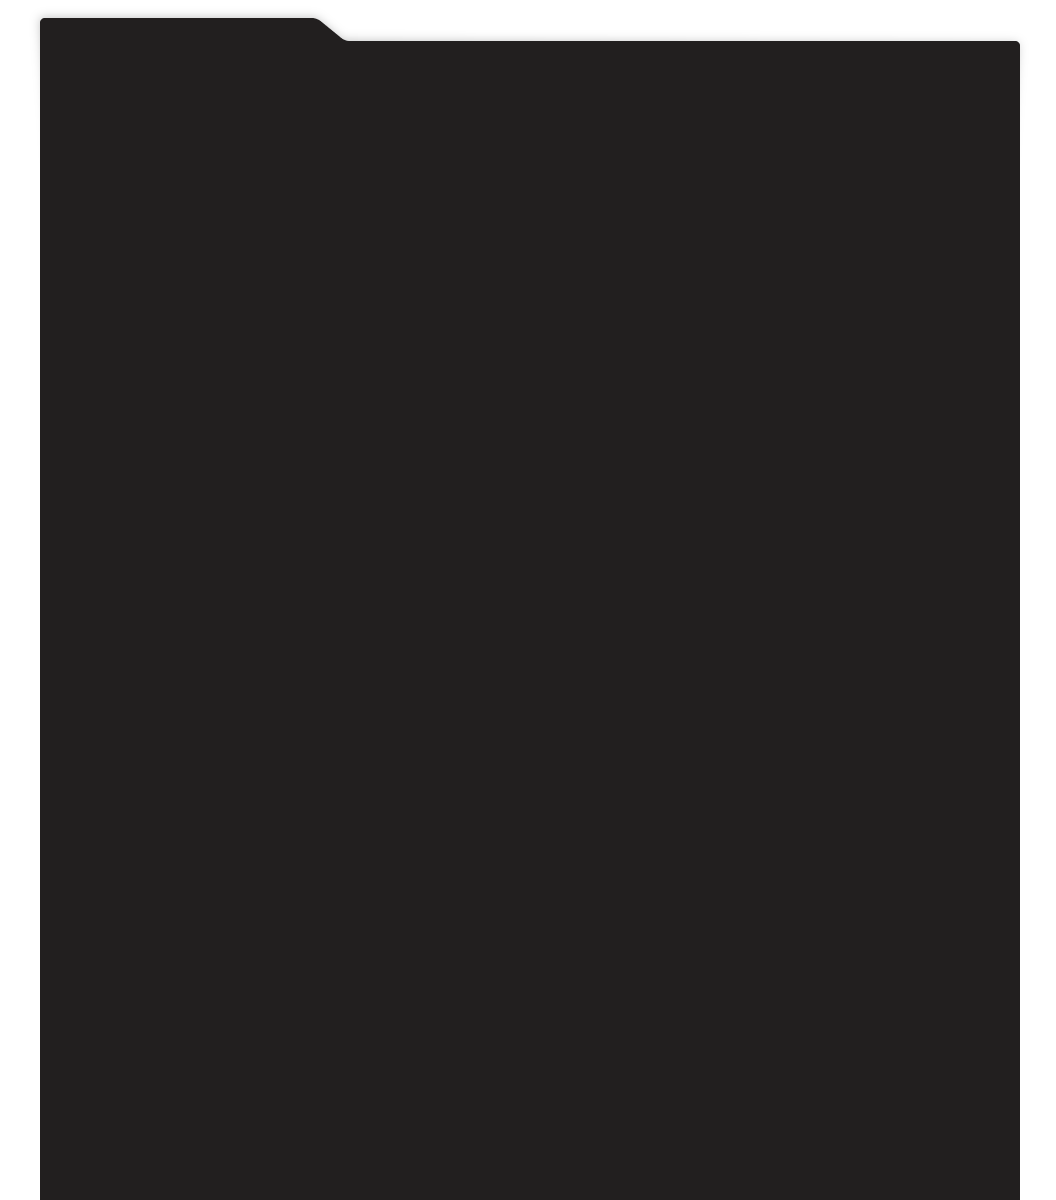
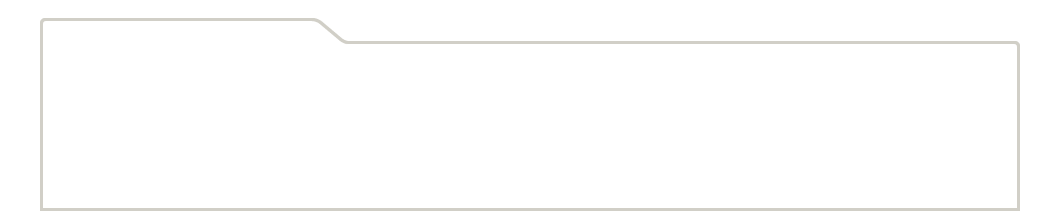
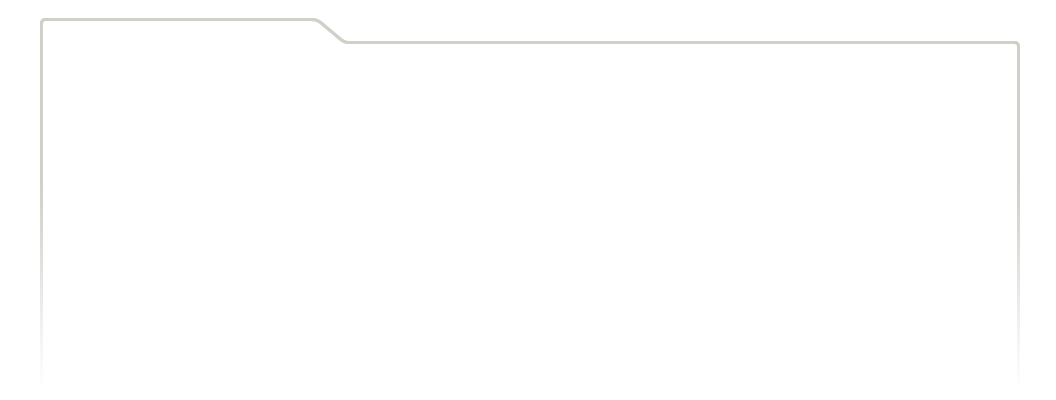
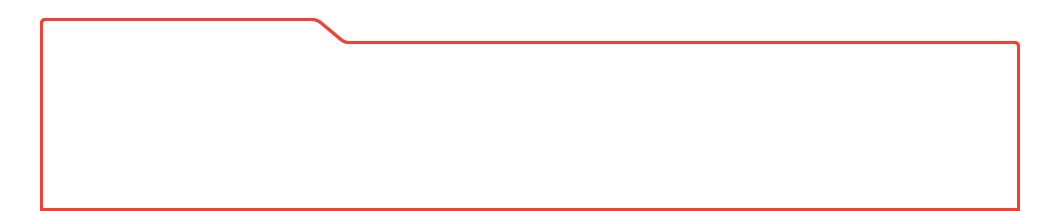
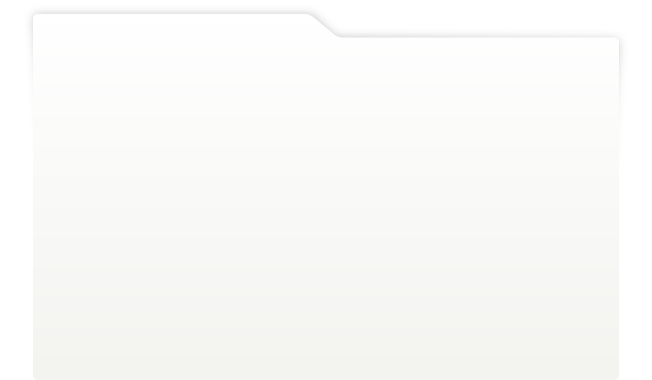
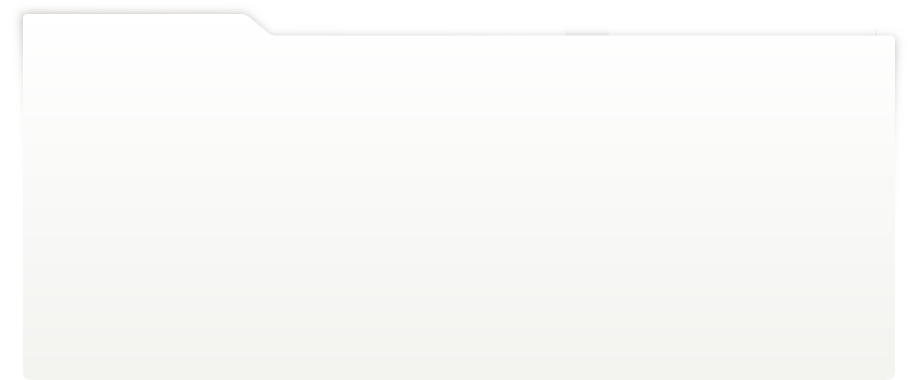
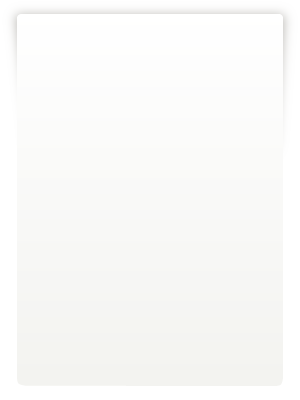
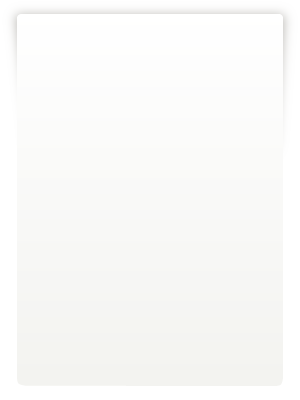
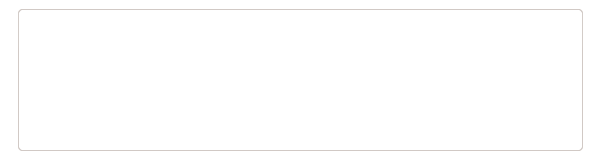
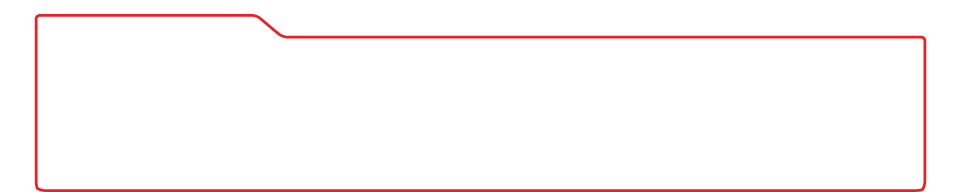
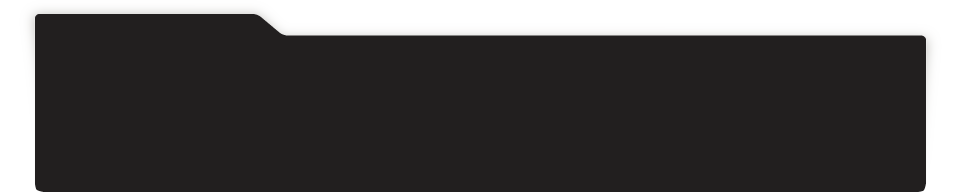
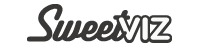
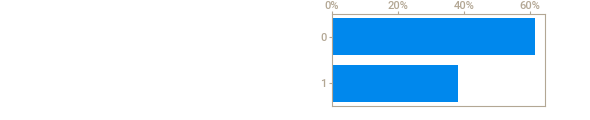
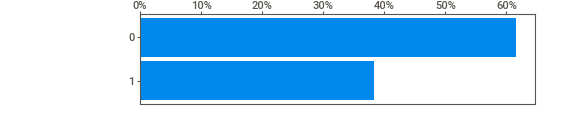
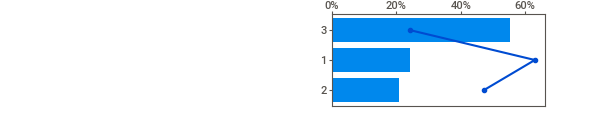
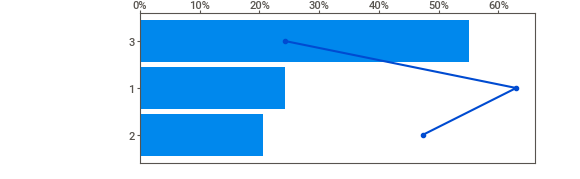
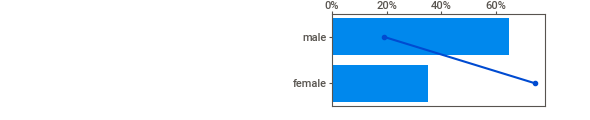
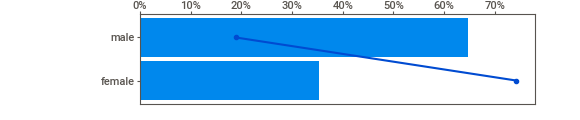
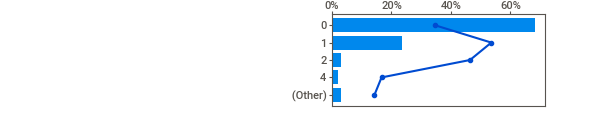
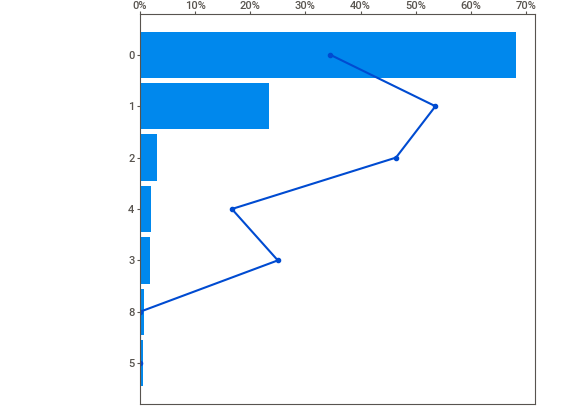
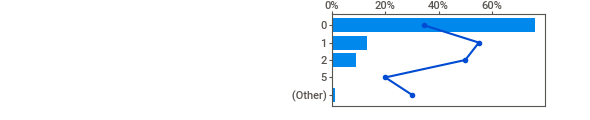
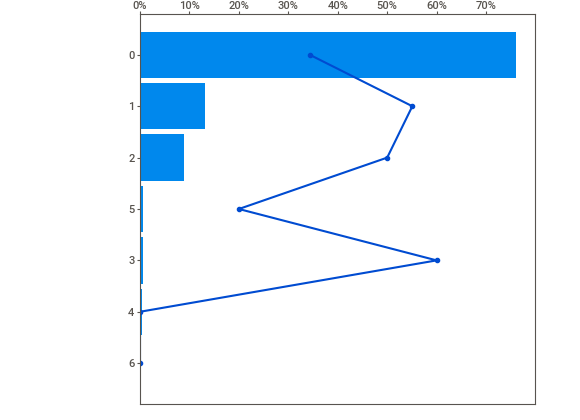
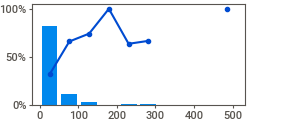
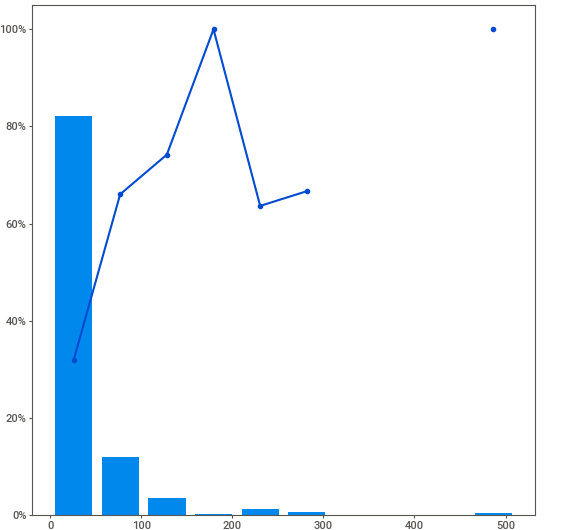
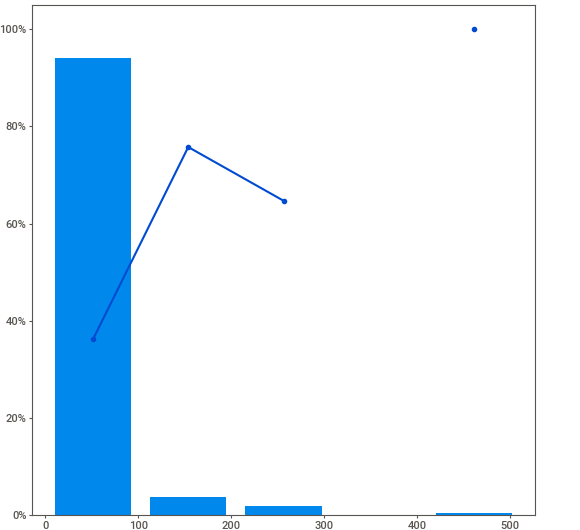
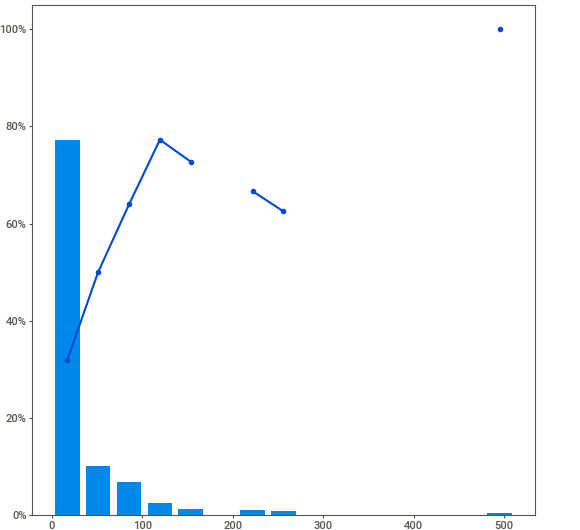
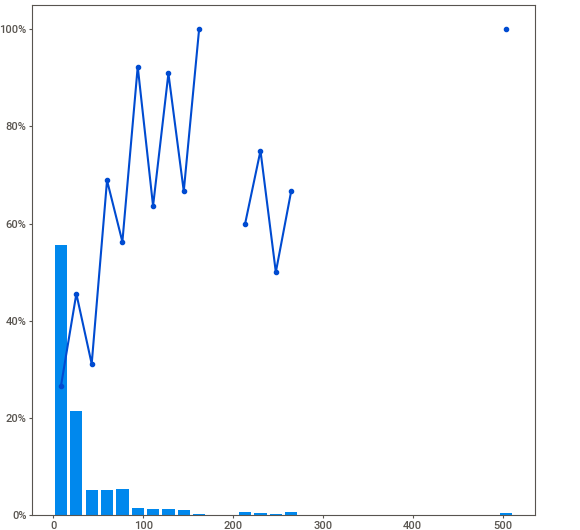
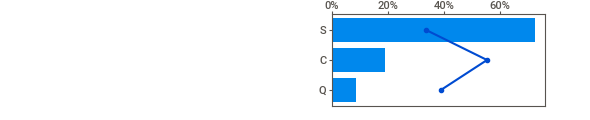
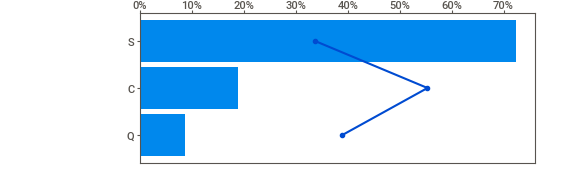
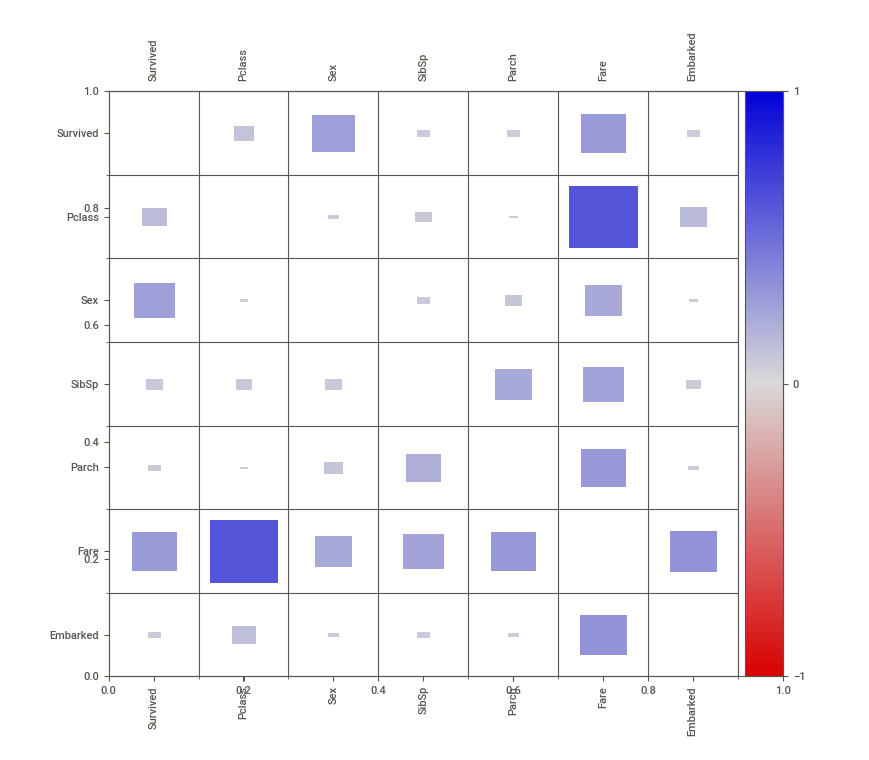
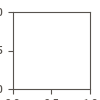

In [15]:
sv.config_parser.read("Override.ini")
feature_config = sv.FeatureConfig(skip="PassengerId", force_text=["Age"])
analyze_report = sv.analyze([data_raw,'Train'], 'Survived',  feature_config)
analyze_report.show_html(filepath='Analyze_report.html', layout='vertical', scale=None)
analyze_report.show_notebook()

                                             |      | [  0%]   00:00 -> (? left)

Report Compare_report_male_female.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



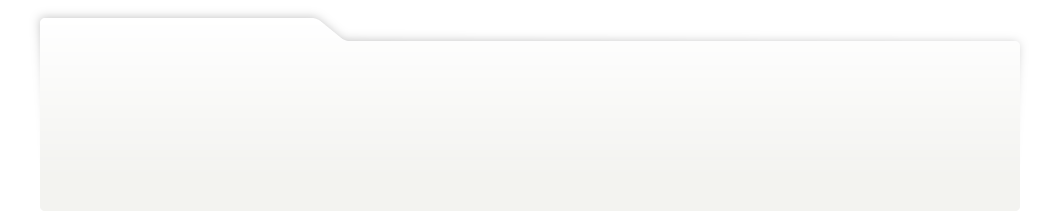
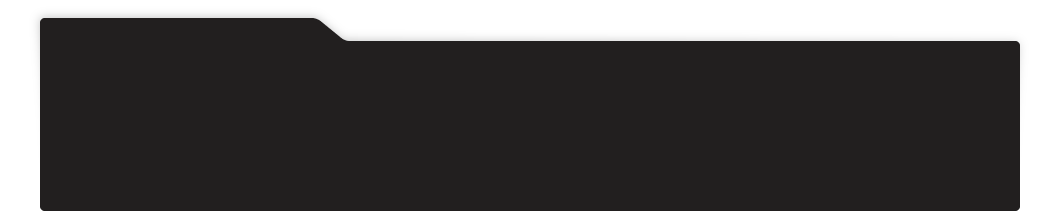
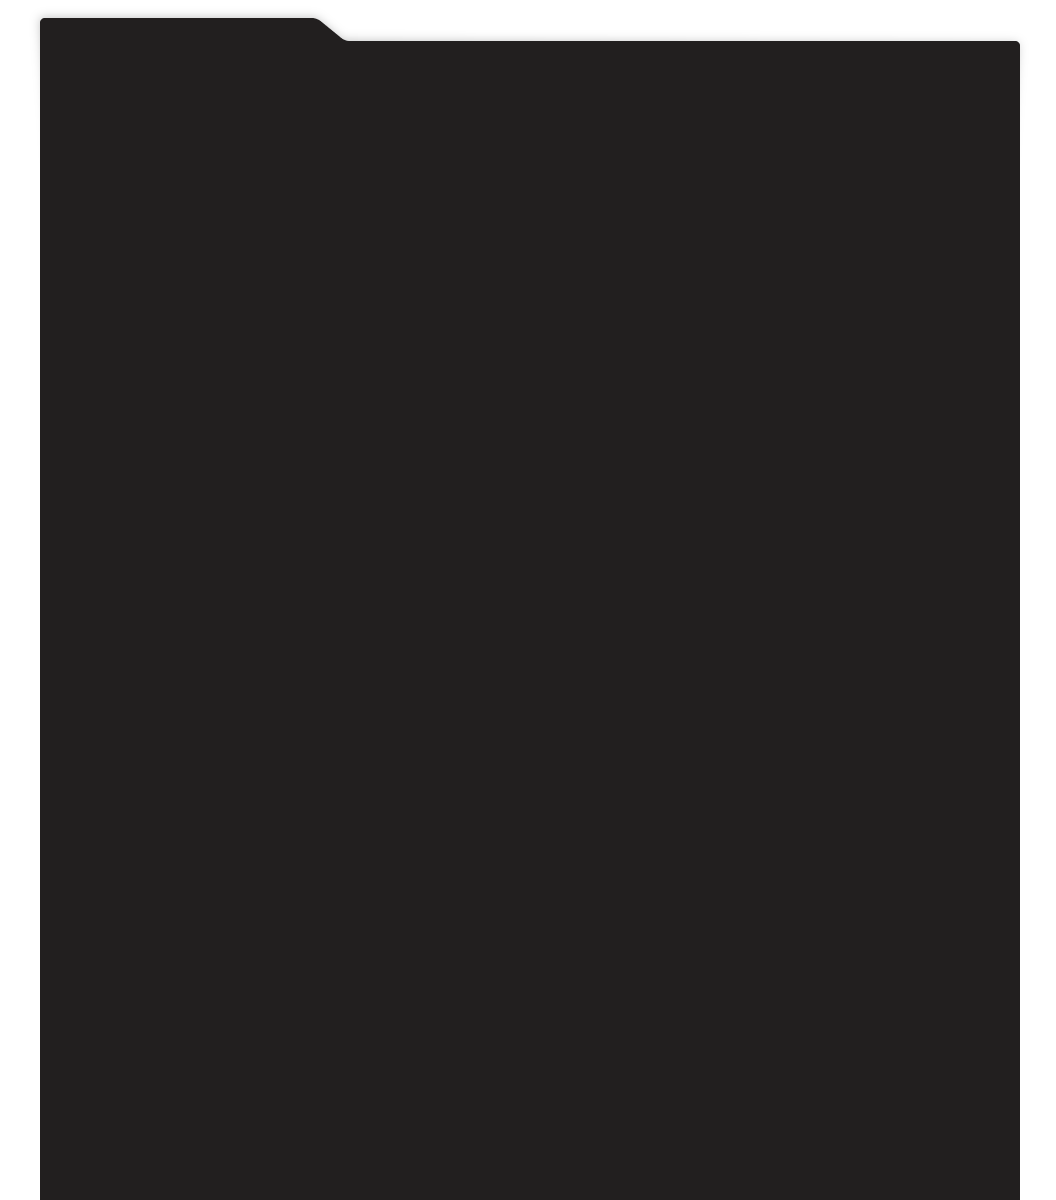
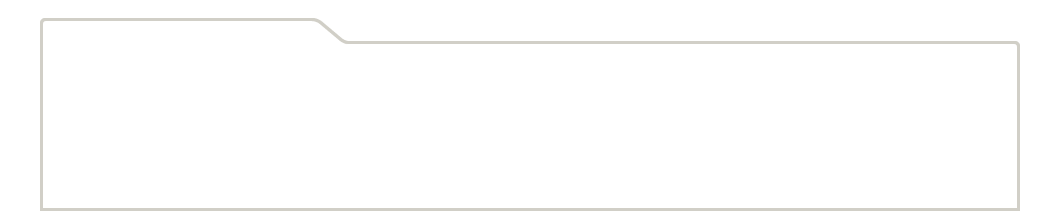
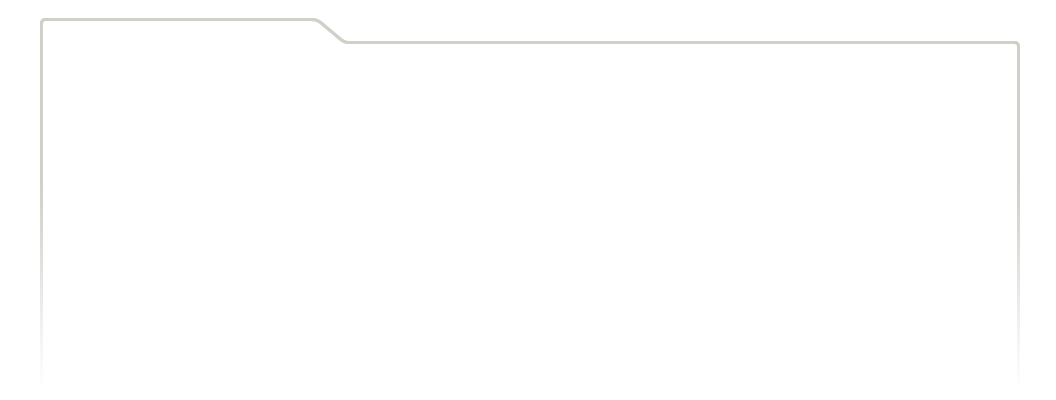
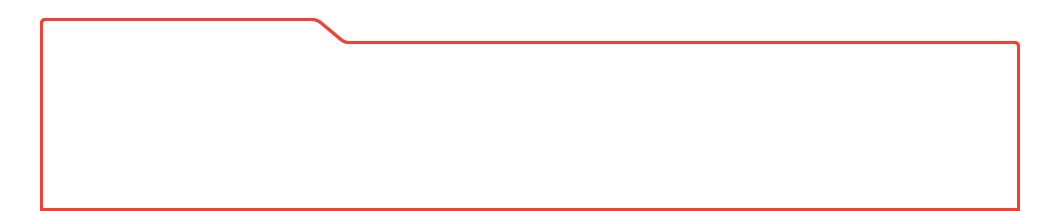
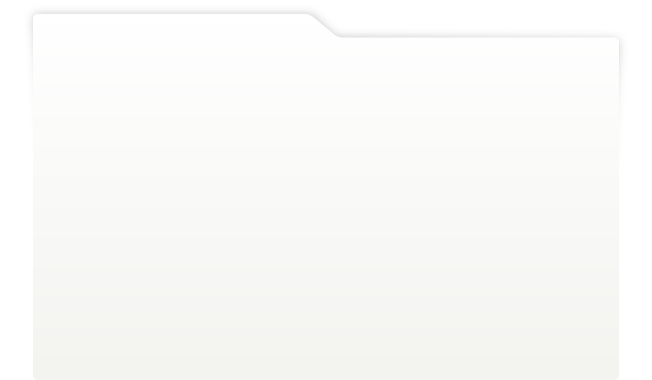
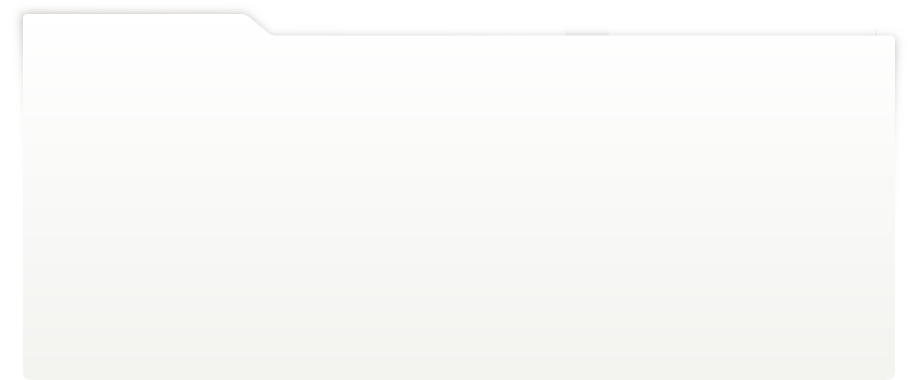
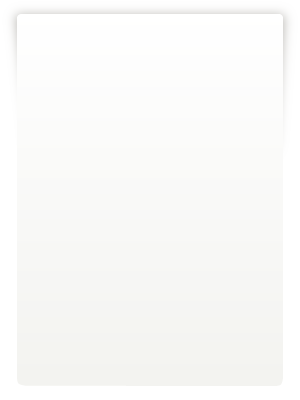
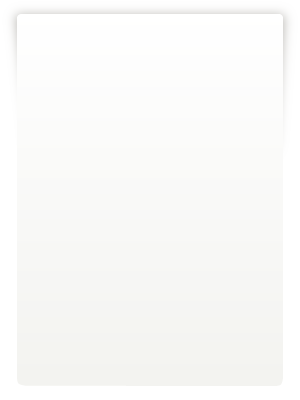
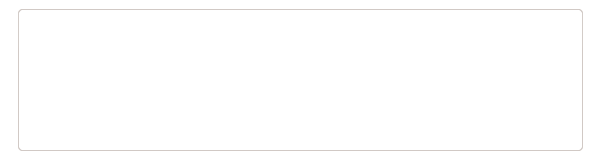
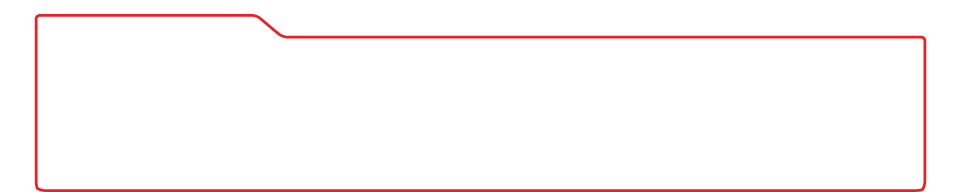
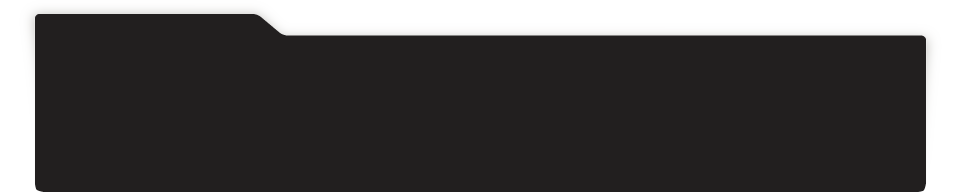
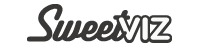
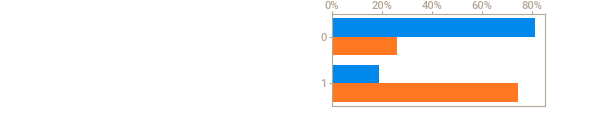
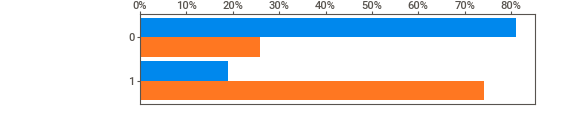
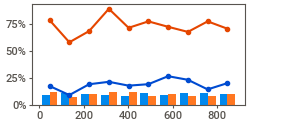
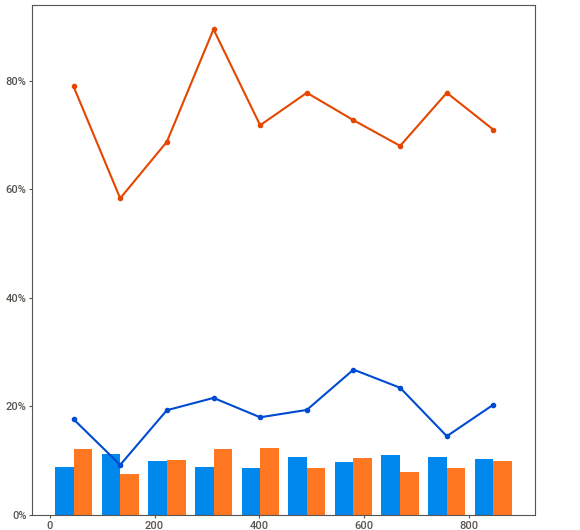
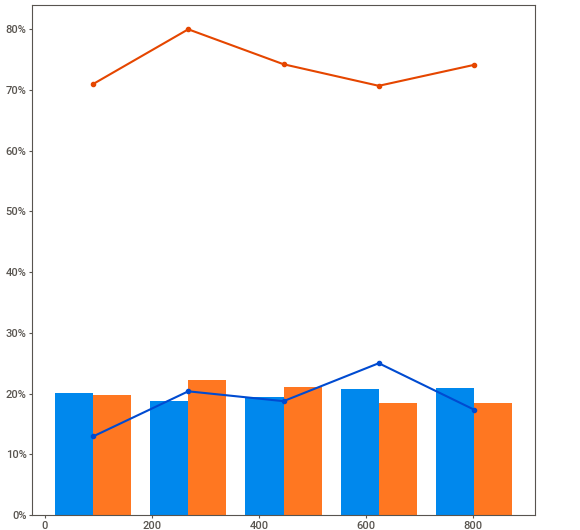
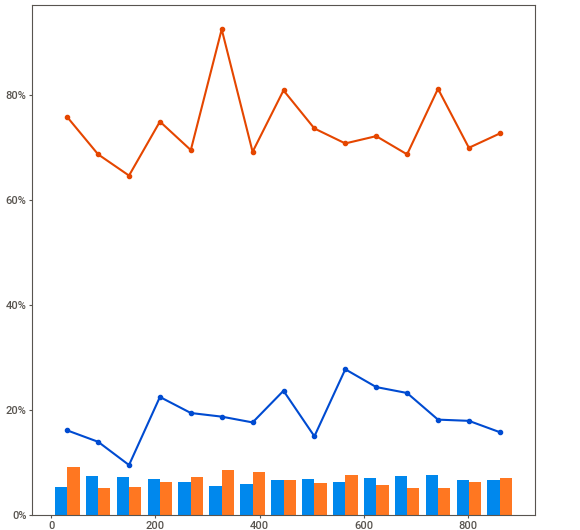
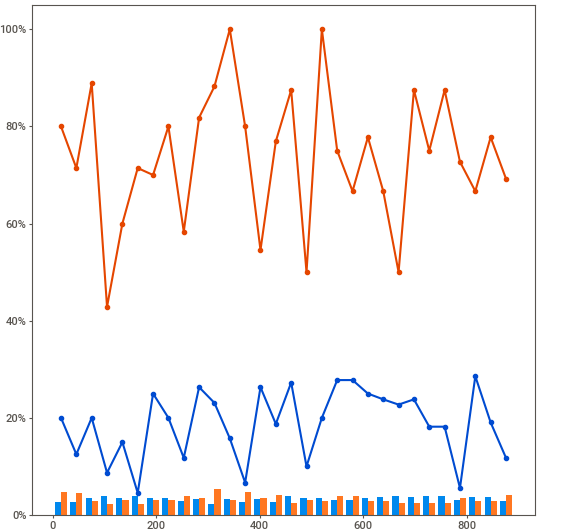
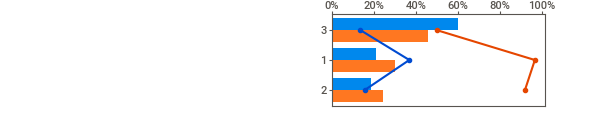
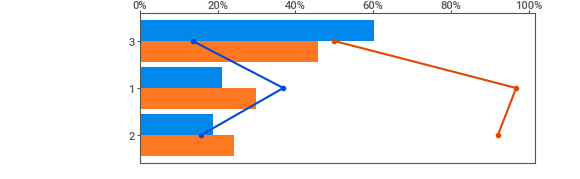
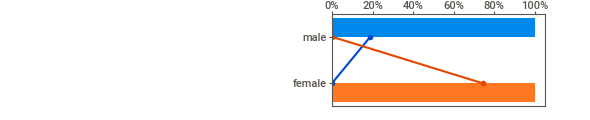
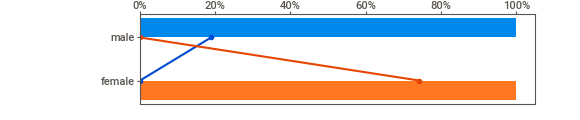
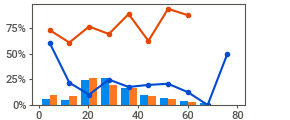
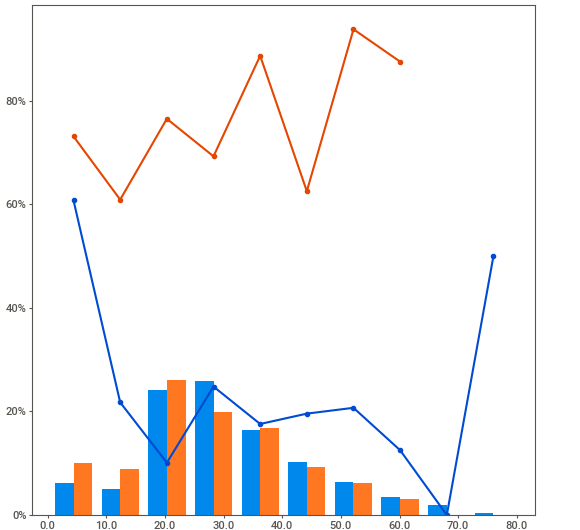
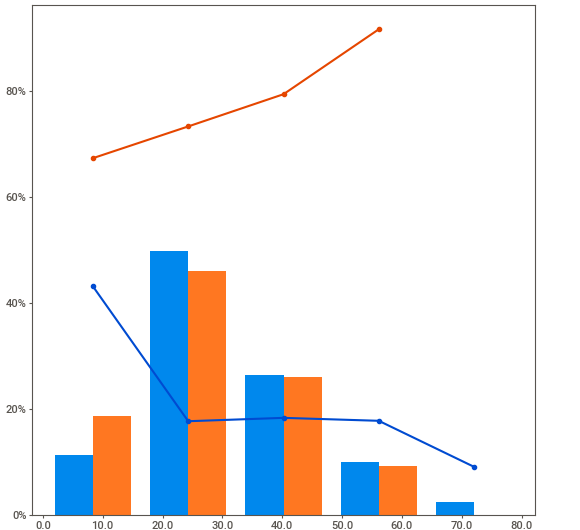
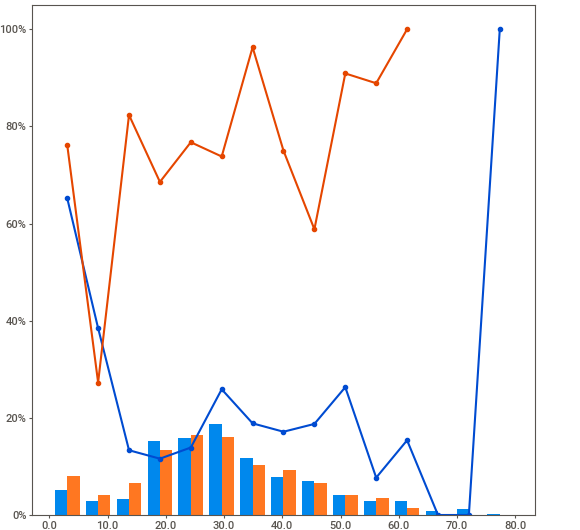
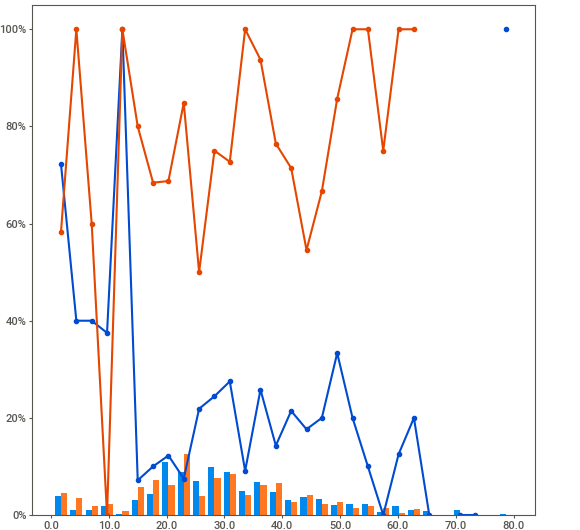
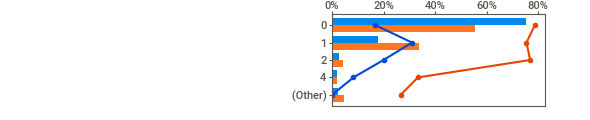
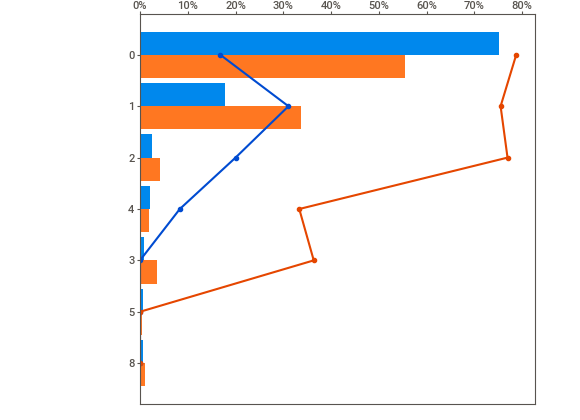
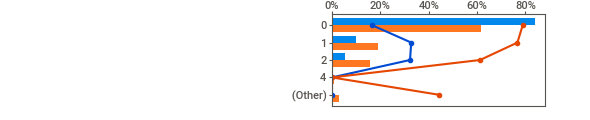
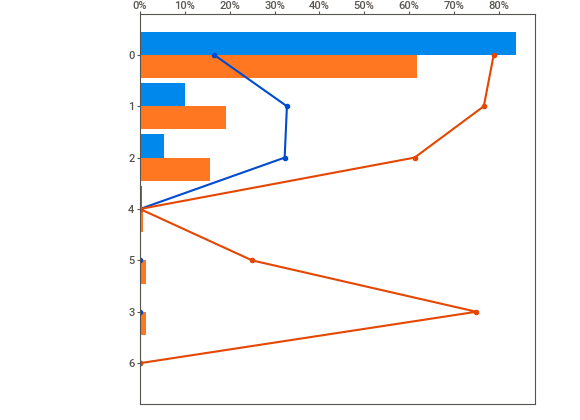
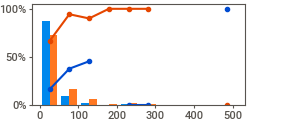
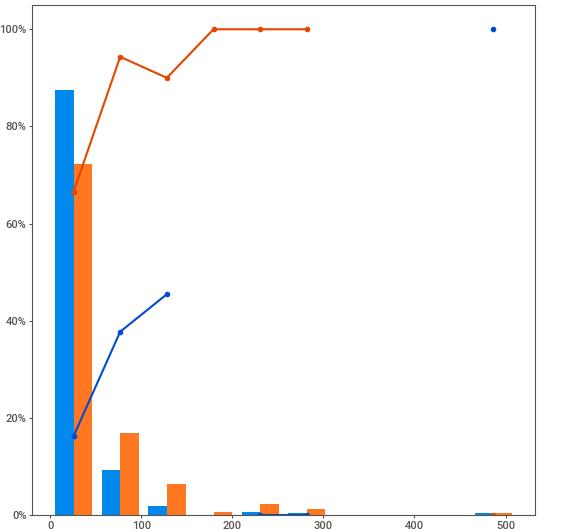
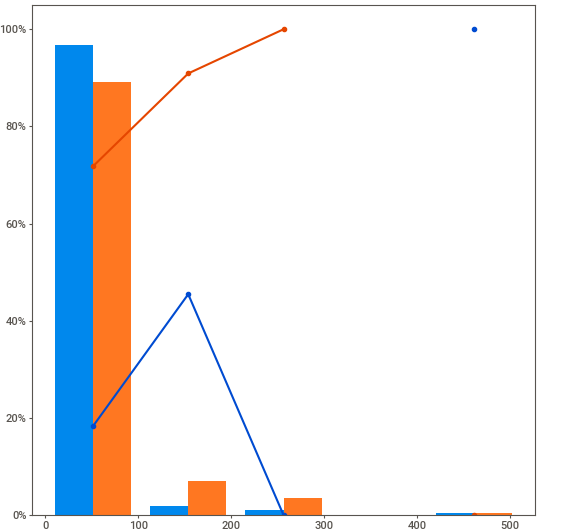
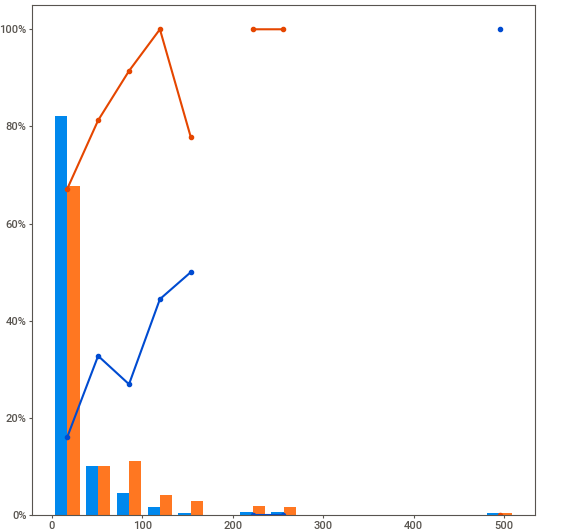
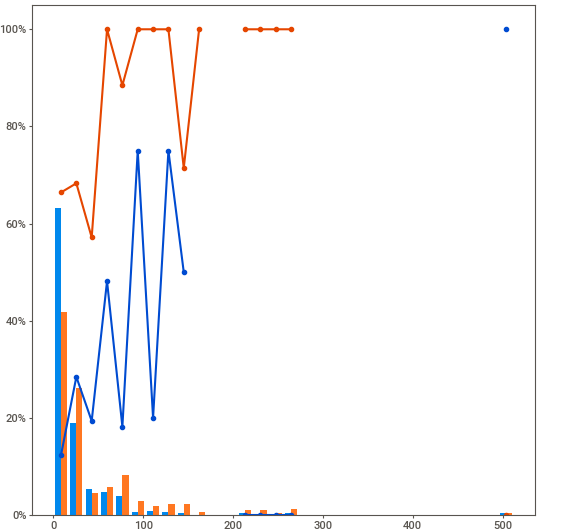
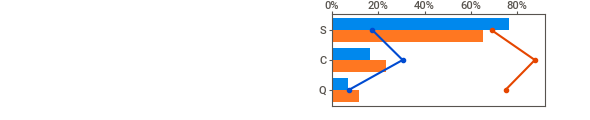
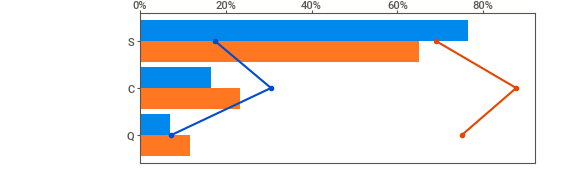
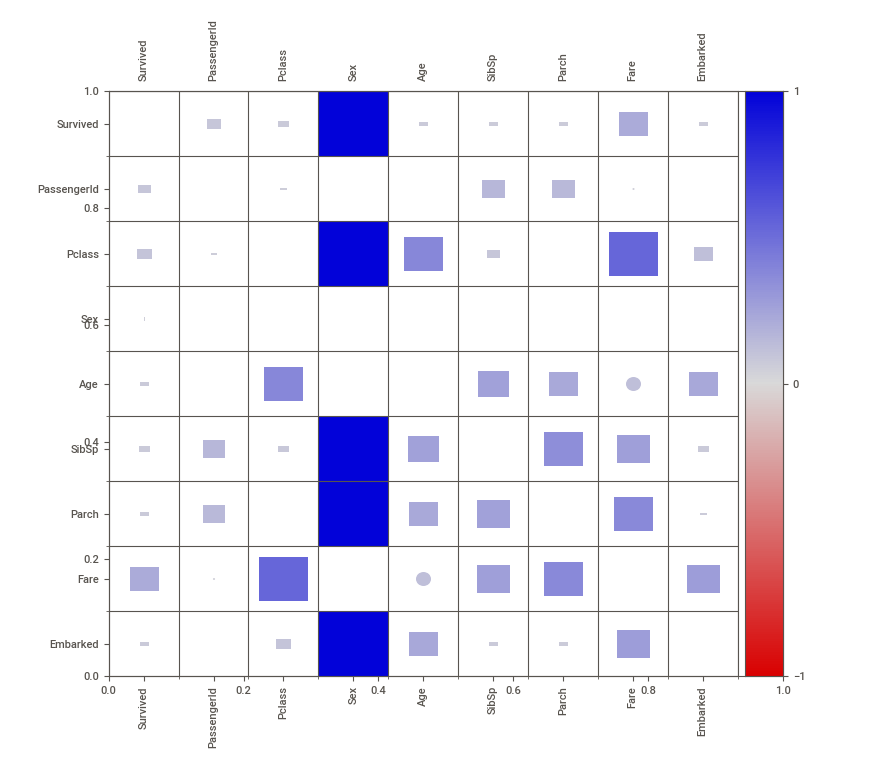
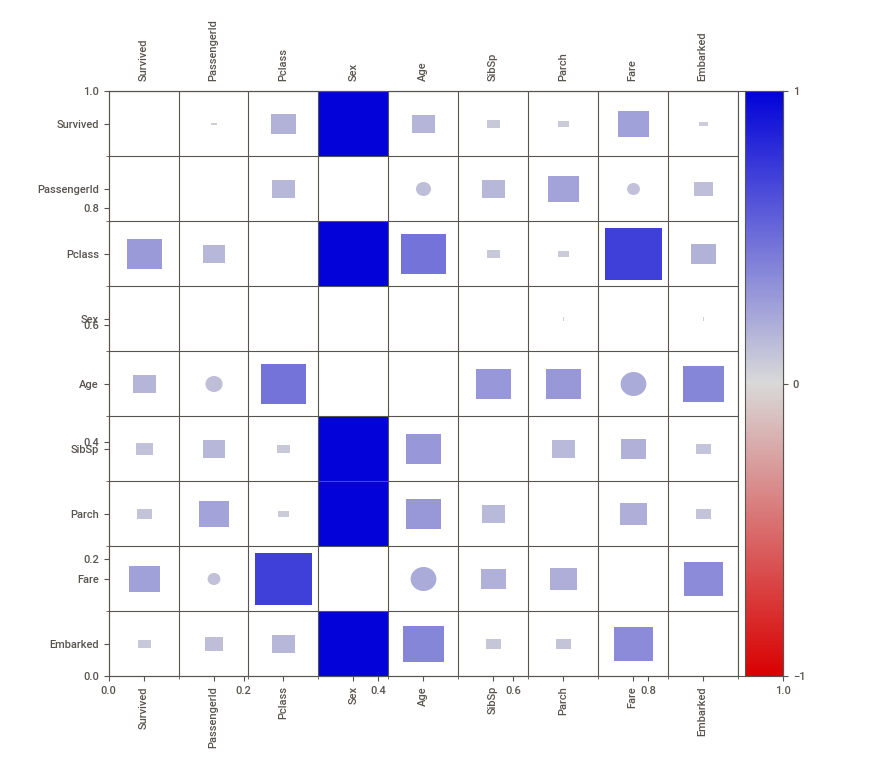

In [17]:
intra_report = sv.compare_intra(data_raw, data_raw["Sex"] == 'male', ["Male", "Female"], 'Survived')
intra_report.show_html(filepath='Compare_report_male_female.html', layout='vertical', scale=None)
intra_report.show_notebook()

## Missing data treatment

In [19]:
data = data_raw.copy().drop(columns = 'Cabin')
data['Age'] = data['Age'].fillna(28)
data['Embarked'] = data['Embarked'].fillna('S')

# Decision Tree



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import ScalarFormatter, FixedLocator

In [23]:
age1 =  data.loc[data.Survived==1, 'Age'].apply(lambda x: max(0, x+2*(random.random()-0.5)))
fare1 = data.loc[data.Survived==1,'Fare'].apply(lambda x: max(0, x+2*(random.random()-0.5)))
age0 =  data.loc[data.Survived==0, 'Age'].apply(lambda x: max(0, x+2*(random.random()-0.5)))
fare0 = data.loc[data.Survived==0,'Fare'].apply(lambda x: max(0, x+2*(random.random()-0.5)))

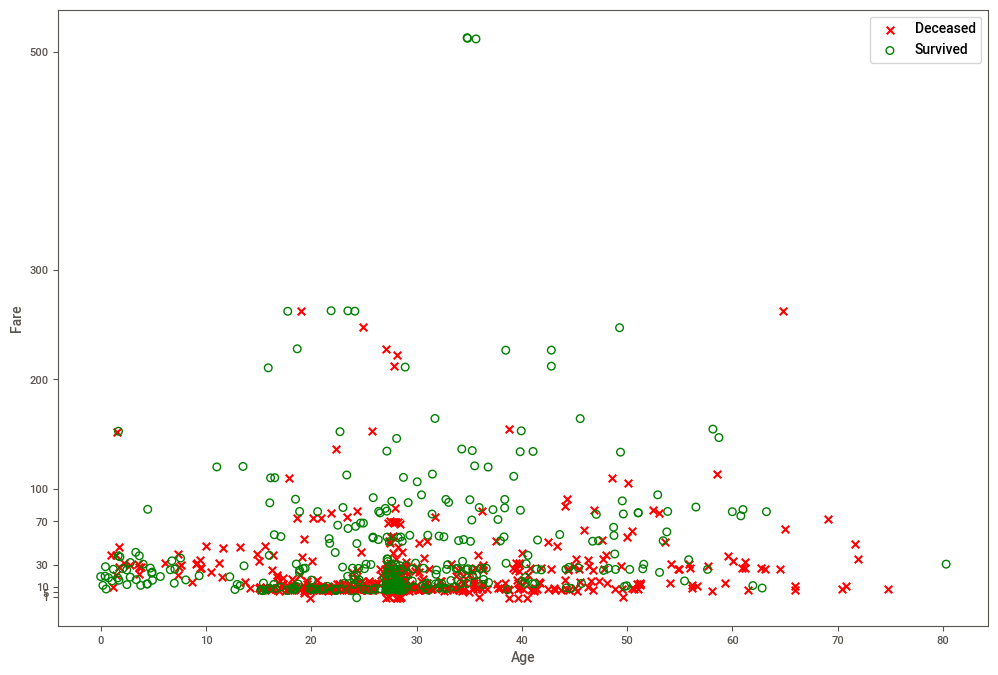

In [25]:
# Creating our plot
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(age0, fare0, label = 'Deceased',
           s=30, marker='x', color='red')

ax.scatter(age1, fare1, label = 'Survived',
           s=30, facecolors='none', edgecolors='green')

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
# ax.set_yscale('log')

# plt.hlines(y = 14, xmin = 1, xmax = 80, linestyles='dashed',linewidth=4)
# plt.vlines(x = 30, ymin = 0, ymax = 10, linestyles = 'dashed',linewidth=4)
# plt.hlines(y = 73, xmin = 1, xmax = 80, linestyles = 'dashed',linewidth=4)
# plt.vlines(x = 26, ymin = 0, ymax = 10, linestyles = 'dashed',linewidth=4)

ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_locator(FixedLocator([1,5,10,30,70,100,200,300,500]))

# ax.text(35, 160, '5', size = 50)
# ax.text(35, 20,  '4', size = 50)
# ax.text(26, 1, '3', size = 50)
# ax.text(40, 1, '2', size = 50)
# ax.text(10, 1, '1', size = 50)

# Checking to which classes those (new) observations will be assigned
# ax.scatter(20, 8, s=20, edgecolors='black', facecolors='yellow')
# ax.scatter(40, 200, s=20, edgecolors='black', facecolors='yellow')

ax.legend()
plt.show()


## Simple decision tree model training

In [28]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix,  classification_report
import matplotlib.pyplot as plt

In [30]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [32]:
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth = 100,
                              random_state = 0,
                              min_samples_leaf = 1,
                              criterion = 'gini')

# Training, aka fitting our model to the data
tree.fit(data.loc[:, ['Age', 'Fare']],
         data.Survived)

# Prediction
predictions = tree.predict(data.loc[:, [ 'Age', 'Fare']])

In [34]:
predictions_test = tree.predict(test.loc[:, ['Age', 'Fare']])

In [36]:
pd.concat([test.loc[:, 'PassengerId'],pd.Series(predictions_test)], axis =1 )

PassengerId  0
0            892  0
1            893  0
2            894  1
3            895  1
4            896  0
..           ... ..
413         1305  0
414         1306  1
415         1307  0
416         1308  0
417         1309  1

[418 rows x 2 columns]

### Plot decision tree

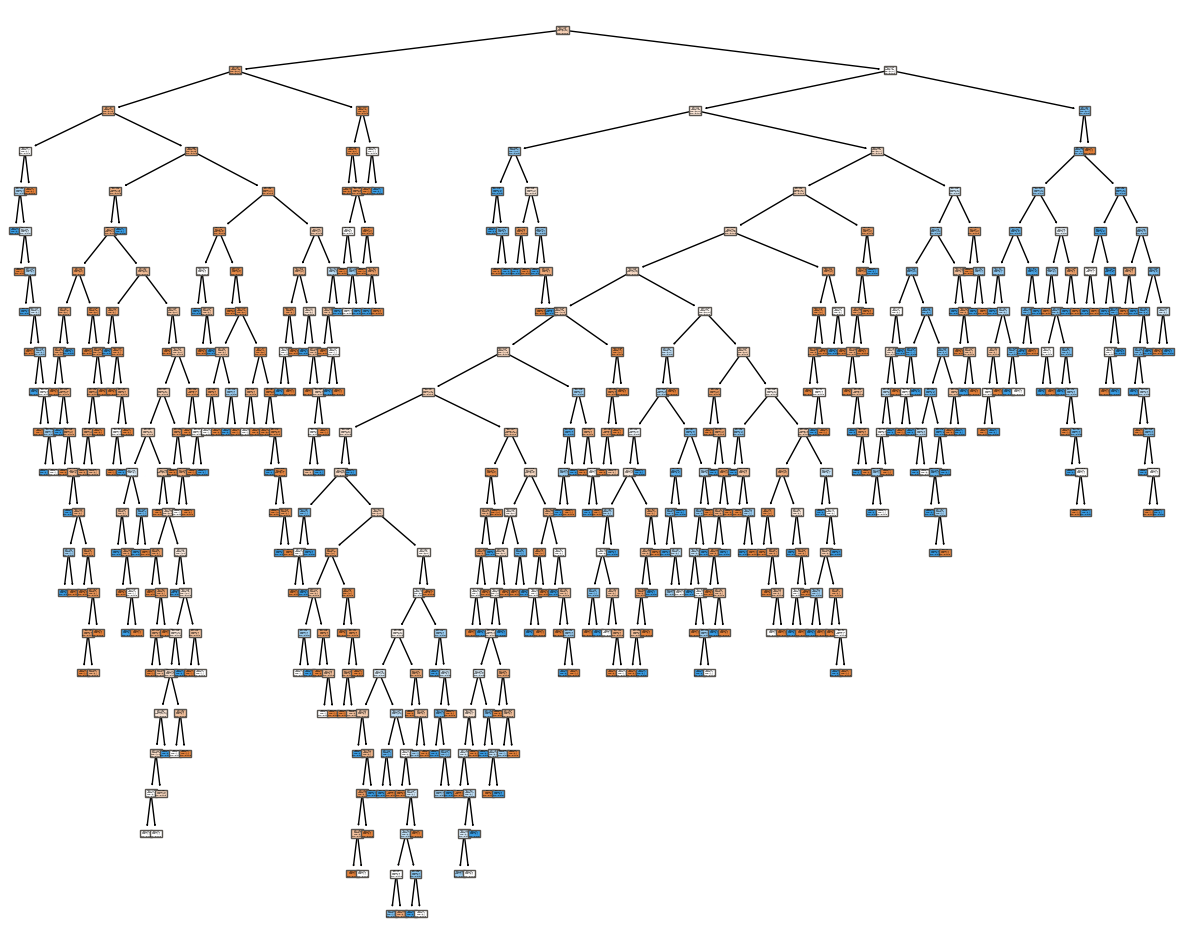

In [39]:
plt.subplots(figsize = (15,12))
plot_tree(tree,impurity =True,
          feature_names = tree.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

In [41]:
split = data['Fare'].apply(lambda x: 'left' if x<10.481 else 'right')
split_data = pd.concat([split, data.Survived], axis = 1)
split_data.value_counts()

Fare   Survived
right  0           277
       1           275
left   0           272
       1            67
Name: count, dtype: int64

In [43]:
split_data['Fare'].value_counts()

Fare
right    552
left     339
Name: count, dtype: int64

In [45]:
1 - (549/891)**2 - (342/891)**2

0.4730129578614428

In [47]:
1 - (272/339)**2 - (67/339)**2,  1 - (277/552)**2 - (275/552)**2

(0.3171570035067568, 0.4999934362528881)

In [51]:
tree.tree_.threshold

array([ 10.48124981,  32.5       ,  16.5       ,   8.8666997 ,
        13.5       ,  -2.        ,  14.5       ,  -2.        ,
         7.2270999 ,  -2.        ,   7.48125005,  -2.        ,
         7.76250005,  -2.        ,   7.90209985,  -2.        ,
         8.0395999 ,  -2.        ,  -2.        ,  -2.        ,
         7.8833499 ,   7.87709999,   7.40415001,  27.5       ,
        26.        ,  19.5       ,  -2.        ,   2.0062499 ,
        -2.        ,   7.1333499 ,  -2.        ,  20.25      ,
        -2.        ,   7.2270999 ,  24.5       ,  -2.        ,
        -2.        ,  21.5       ,  -2.        ,  22.75      ,
         7.23959994,  -2.        ,  -2.        ,  -2.        ,
        -2.        ,   7.13750005,  -2.        ,   7.23959994,
        28.25      ,   7.2270999 ,  -2.        ,  -2.        ,
        -2.        ,  -2.        ,  20.5       ,   7.57290006,
        -2.        ,   7.82500005,  -2.        ,  19.5       ,
        18.5       ,  -2.        ,  -2.        ,  -2.  

In [53]:
tree.tree_.weighted_n_node_samples

array([891., 339., 277.,  14.,  11.,   2.,   9.,   1.,   8.,   1.,   7.,
         1.,   6.,   2.,   4.,   1.,   3.,   1.,   2.,   3., 263., 146.,
       142.,  61.,  28.,  27.,   7.,  20.,   1.,  19.,   6.,  13.,   1.,
        12.,   3.,   2.,   1.,   9.,   2.,   7.,   5.,   1.,   4.,   2.,
         1.,  33.,  12.,  21.,  16.,  13.,   6.,   7.,   3.,   5.,  81.,
        11.,   1.,  10.,   6.,   4.,   2.,   1.,   1.,   2.,  70.,   2.,
        68.,  62.,  56.,  11.,   6.,   1.,   5.,   3.,   2.,   1.,   1.,
         5.,   4.,   1.,  45.,   6.,  39.,   6.,   1.,   5.,   4.,   1.,
         3.,   1.,  33.,   1.,  32.,  29.,  28.,  25.,  24.,   4.,   2.,
         2.,  20.,   1.,   3.,   2.,   1.,   1.,   3.,   1.,   2.,   6.,
         2.,   4.,   2.,   2.,   6.,   4.,   2.,   1.,   1.,   4., 117.,
        98.,   8.,   2.,   6.,   4.,   2.,  90.,  30.,  60.,   9.,   6.,
         2.,   4.,   3.,   2.,   1.,  51.,   4.,   2.,   2.,  47.,  24.,
        23.,   1.,  22.,  14.,   8.,   1.,   7.,  1

In [55]:
tree.tree_.impurity

array([0.47301296, 0.317157  , 0.35141863, 0.5       , 0.46280992,
       0.        , 0.49382716, 0.        , 0.46875   , 0.        ,
       0.48979592, 0.        , 0.44444444, 0.        , 0.5       ,
       0.        , 0.44444444, 0.        , 0.5       , 0.        ,
       0.33517905, 0.39153687, 0.37145408, 0.25154528, 0.33673469,
       0.30178326, 0.        , 0.375     , 0.        , 0.33240997,
       0.        , 0.4260355 , 0.        , 0.375     , 0.44444444,
       0.        , 0.        , 0.19753086, 0.        , 0.24489796,
       0.32      , 0.        , 0.375     , 0.        , 0.        ,
       0.16528926, 0.        , 0.24489796, 0.3046875 , 0.35502959,
       0.27777778, 0.40816327, 0.        , 0.        , 0.43590916,
       0.29752066, 0.        , 0.18      , 0.        , 0.375     ,
       0.5       , 0.        , 0.        , 0.        , 0.45061224,
       0.        , 0.4567474 , 0.46670135, 0.47704082, 0.49586777,
       0.44444444, 0.        , 0.32      , 0.        , 0.5    

In [57]:
tree.tree_.__dir__()

['__new__',
 '__reduce__',
 '__getstate__',
 '__setstate__',
 'compute_partial_dependence',
 'n_classes',
 'children_left',
 'children_right',
 'n_leaves',
 'feature',
 'threshold',
 'impurity',
 'n_node_samples',
 'weighted_n_node_samples',
 'missing_go_to_left',
 'value',
 'n_features',
 'n_outputs',
 'max_n_classes',
 'max_depth',
 'node_count',
 'capacity',
 '__doc__',
 '__pyx_vtable__',
 'predict',
 'apply',
 'decision_path',
 'compute_node_depths',
 'compute_feature_importances',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

## Model quality

In [60]:
print(classification_report(data.Survived, predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       549
           1       0.98      0.87      0.92       342

    accuracy                           0.95       891
   macro avg       0.95      0.93      0.94       891
weighted avg       0.95      0.95      0.94       891



## Categorical features and One-hot encoding

In [64]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [68]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(data.loc[:,['Sex']],)
encoded_data_pandas = pd.DataFrame(encoded_data,
                                   columns = encoder.get_feature_names_out())

pd.concat([data.loc[:,['Sex']],
           encoded_data_pandas.add_prefix('OHE_')],
          axis = 1)

Sex  OHE_Sex_female  OHE_Sex_male
0      male             0.0           1.0
1    female             1.0           0.0
2    female             1.0           0.0
3    female             1.0           0.0
4      male             0.0           1.0
..      ...             ...           ...
886    male             0.0           1.0
887  female             1.0           0.0
888  female             1.0           0.0
889    male             0.0           1.0
890    male             0.0           1.0

[891 rows x 3 columns]

### Add categorical features

In [71]:
data_with_sex = pd.concat([data, encoded_data_pandas.add_prefix('OHE_')], axis = 1 )

In [73]:
data_with_sex

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  28.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Embarked  OHE_Sex_female  OHE_Sex_male  
0        0         A/5 21171   7.2500        S             0.0           1.0  
1        0          PC 17599  71.2833        C             1.0           0.0  
2        0  STON/O2. 3101282   7.9250        S             1.0           0.0  
3        0            113803  53.1000        S             1.0           0.0  
4        0            373450   8.0500        S             0.0           1.0  
..     ...               ...      ...      ...             ...           ...  
886      0            211536  13.0000        S             0.0           1.0  
887      0            112053  30.0000        S             1.0           0.0  
888      2        W./C. 6607  23.4500        S             1.0           0.0  
889      0            111369  30.0000        C             0.0           1.0  
890      0            370376   7.7500        Q             0.0           1.0  

[891 rows x 13 columns]

In [75]:
data_with_sex.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'OHE_Sex_female',
       'OHE_Sex_male'],
      dtype='object')

In [77]:
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth = 5,
                              random_state = 0,
                              min_samples_leaf = 10,
                              criterion = 'gini')

# Training, aka fitting our model to the data
tree.fit(data_with_sex.loc[:, ['Age', 'Fare', 'SibSp','OHE_Sex_female']],
         data.Survived)

# Prediction
predictions = tree.predict(data_with_sex.loc[:, [ 'Age', 'Fare', 'SibSp','OHE_Sex_female']])

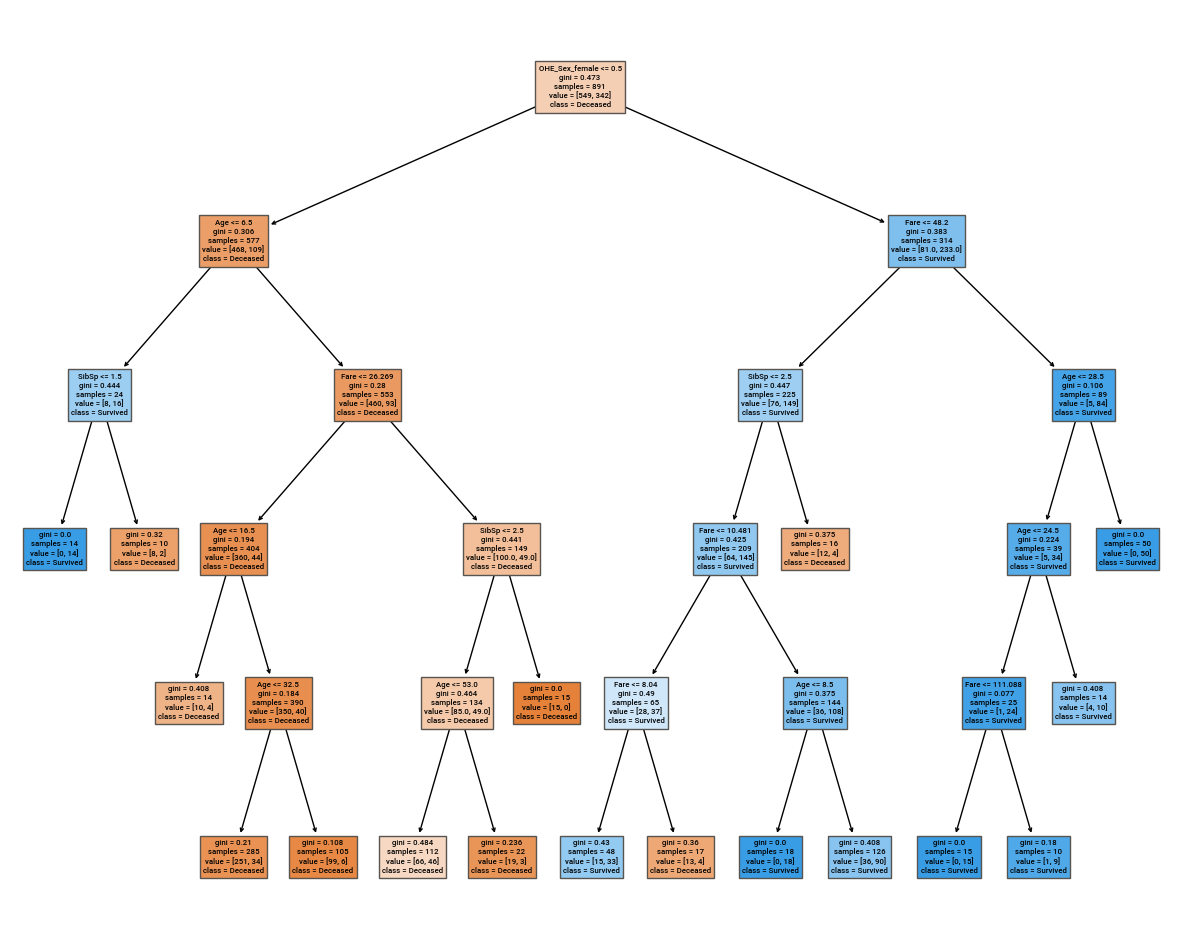

In [79]:
# Creating a plot of our model
plt.subplots(figsize = (15,12))
plot_tree(tree,impurity =True,
          feature_names = tree.feature_names_in_,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()

In [81]:
print(classification_report(data_with_sex.Survived, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.70      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.80      0.81       891
weighted avg       0.82      0.82      0.82       891



In [83]:
cm_data = pd.concat([
    pd.Series(data_with_sex.Survived, name = 'Actual'),
    pd.Series(predictions, name = 'Predicted')], axis = 1)
cm_data

Actual  Predicted
0         0          0
1         1          1
2         1          1
3         1          1
4         0          0
..      ...        ...
886       0          0
887       1          1
888       0          1
889       1          0
890       0          0

[891 rows x 2 columns]

In [85]:
pd.crosstab(cm_data['Actual'],cm_data['Predicted'])

Predicted    0    1
Actual             
0          493   56
1          103  239

## Sampling

❓ Should we split data to train/test  
  
    
Remember that in order to get proper performance estimates you should  use cross-validation or hold-out (train-test split).


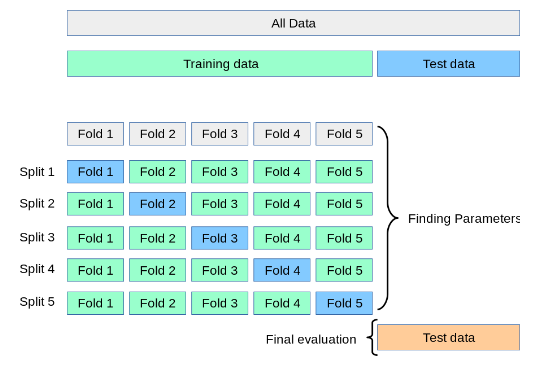


Please check:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* https://scikit-learn.org/stable/modules/cross_validation.html

In [89]:
from sklearn.model_selection import train_test_split
data_raw = pd.read_csv('decision_tree_train.csv')
cols = data_raw.columns.tolist()
cols.remove('Survived')
X_train, X_test, y_train, y_test = train_test_split(data_raw.loc[:,cols],
                                                    data_raw.Survived,
                                                    test_size=0.33,
                                                    random_state=42)

                                             |      | [  0%]   00:00 -> (? left)


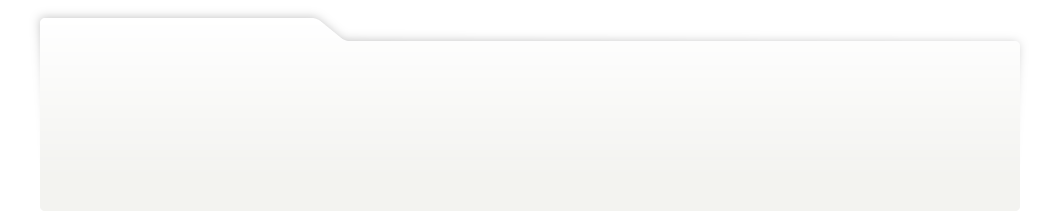
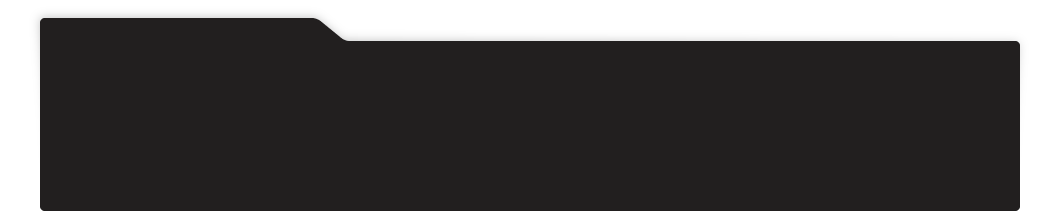
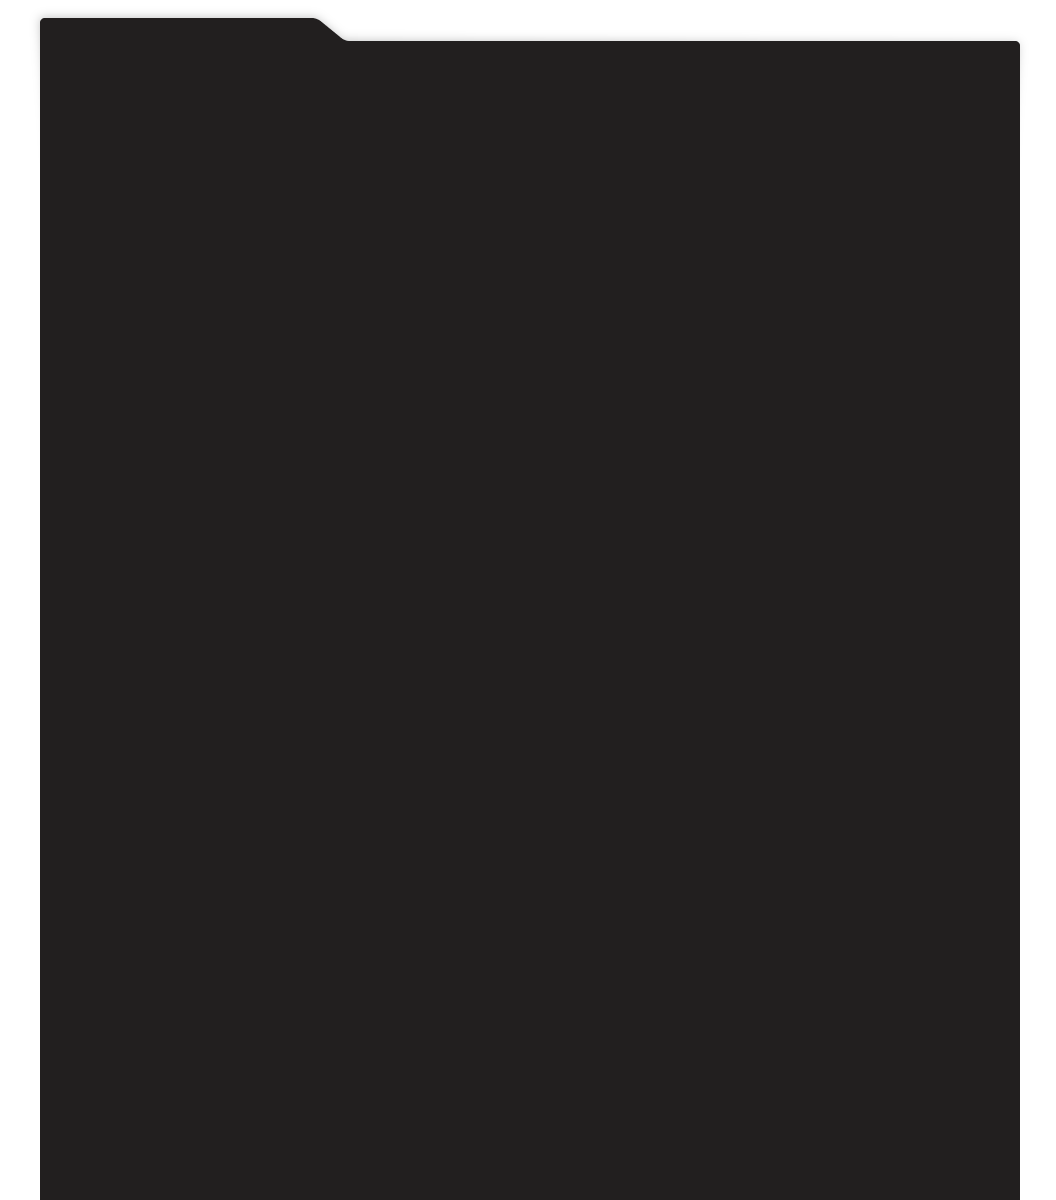
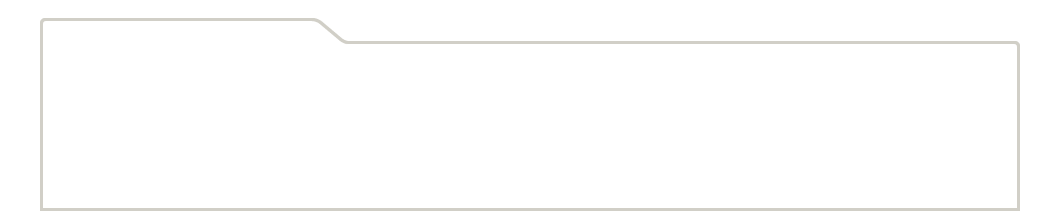
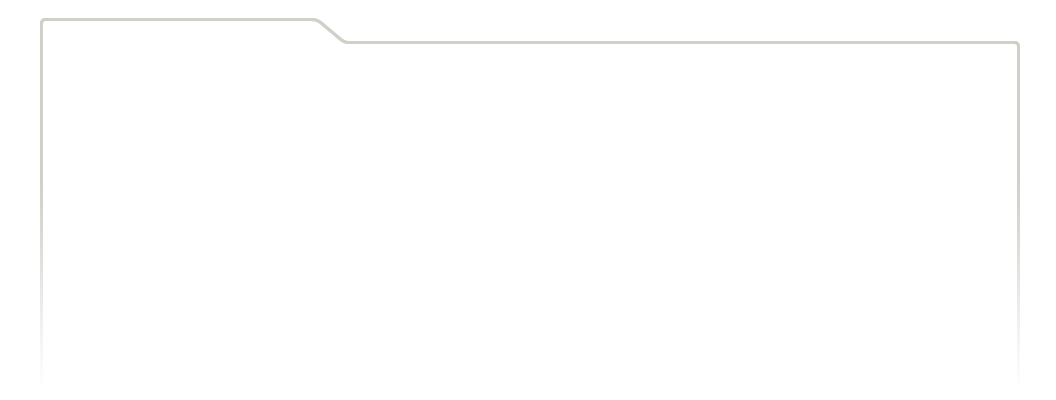
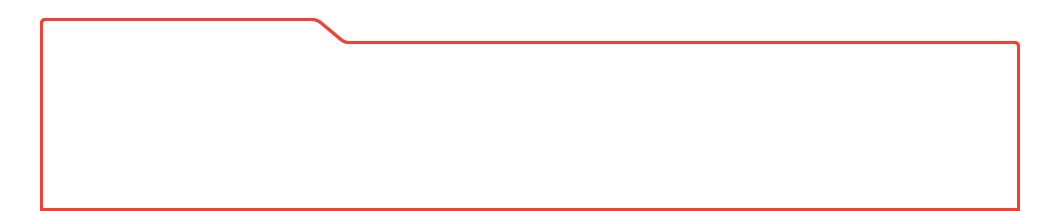
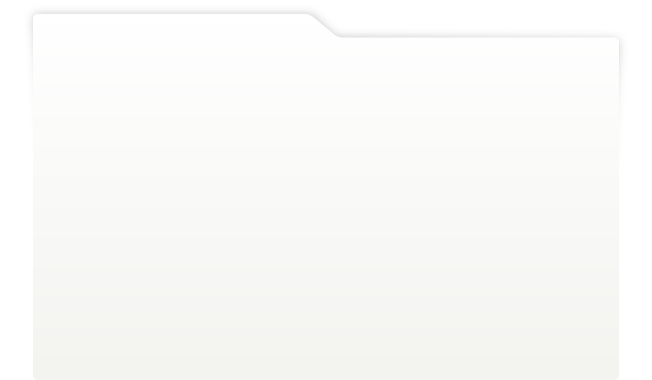
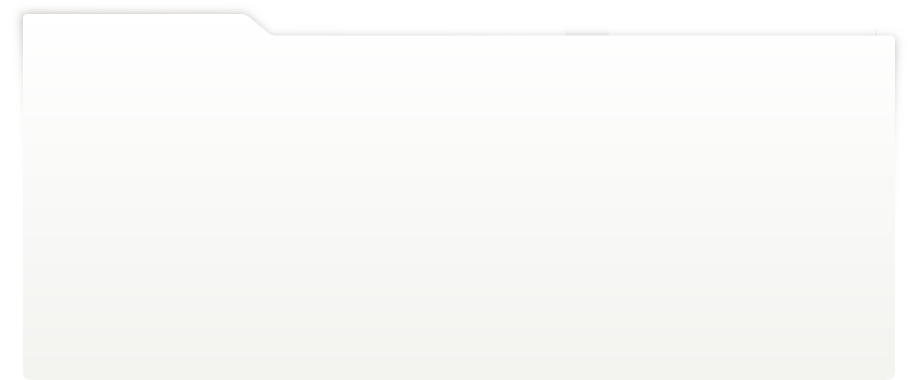
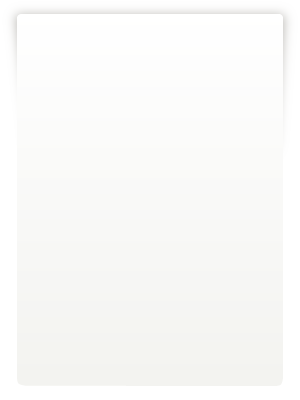
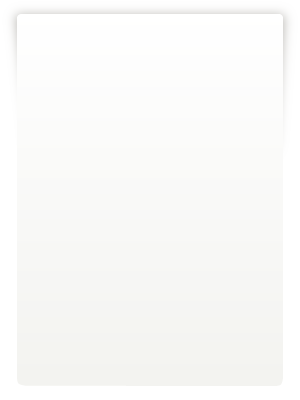
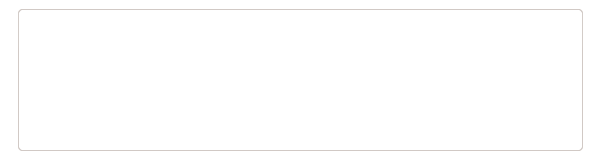
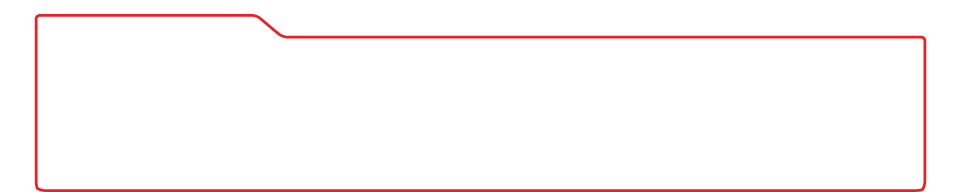
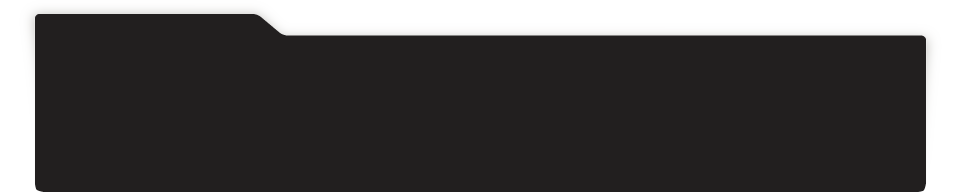
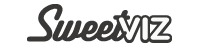
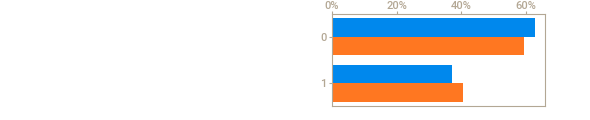
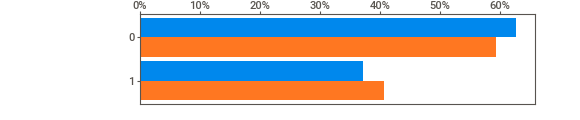
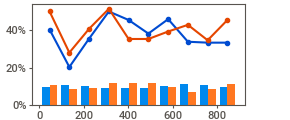
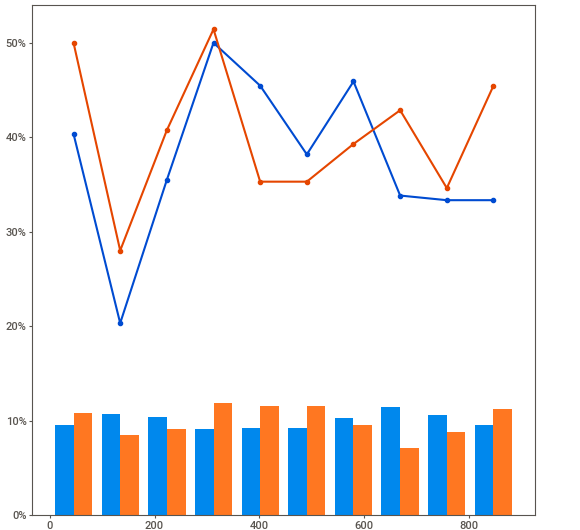
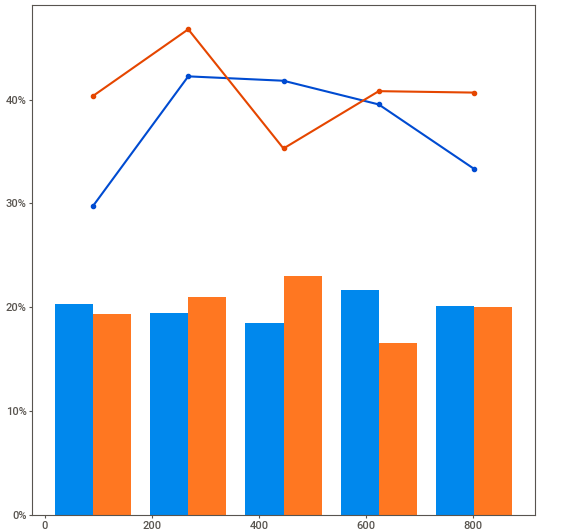
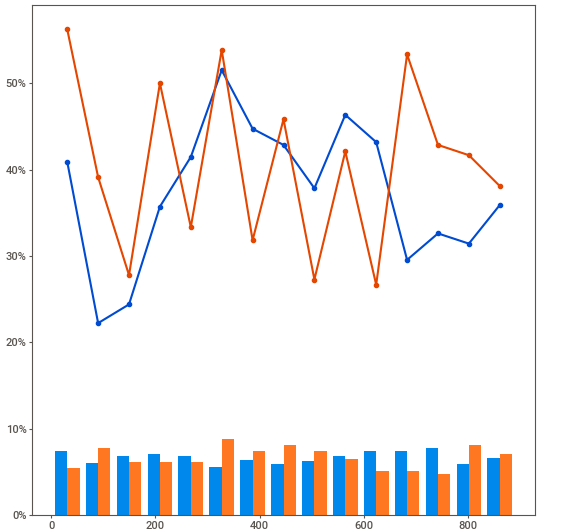
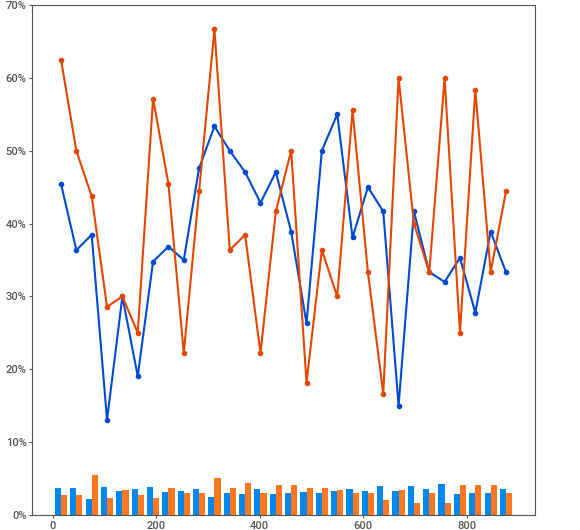
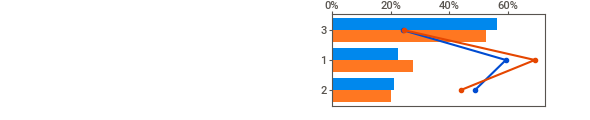
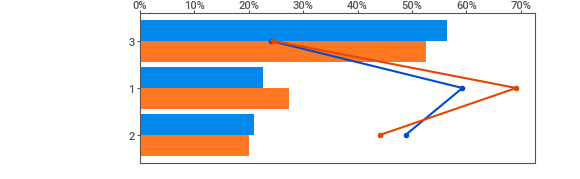
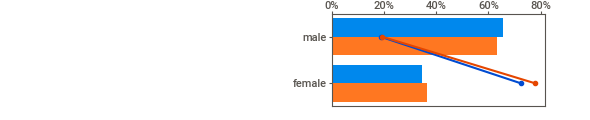
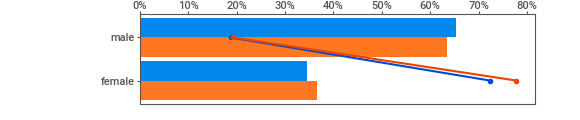
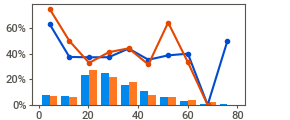
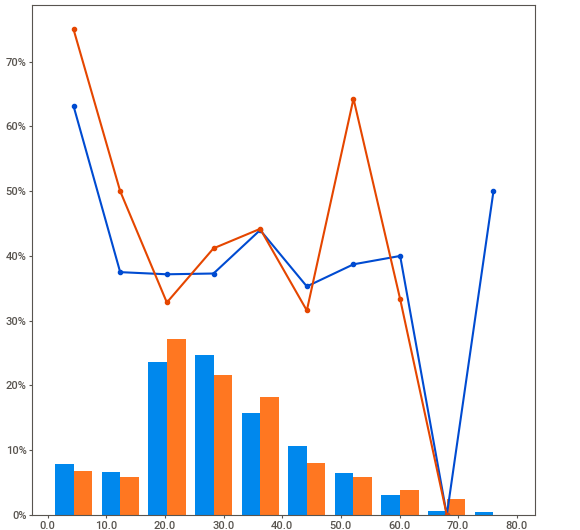
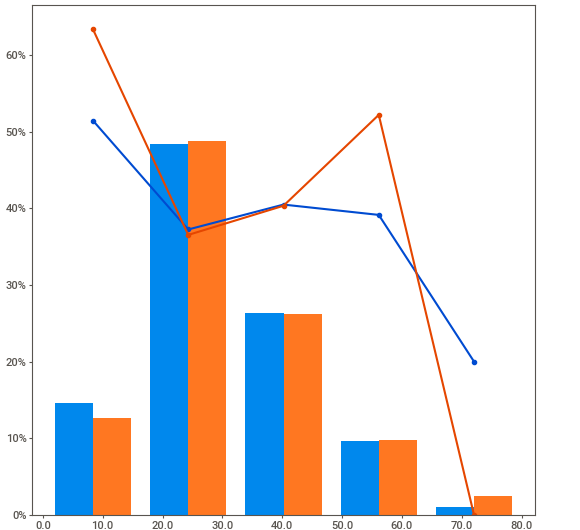
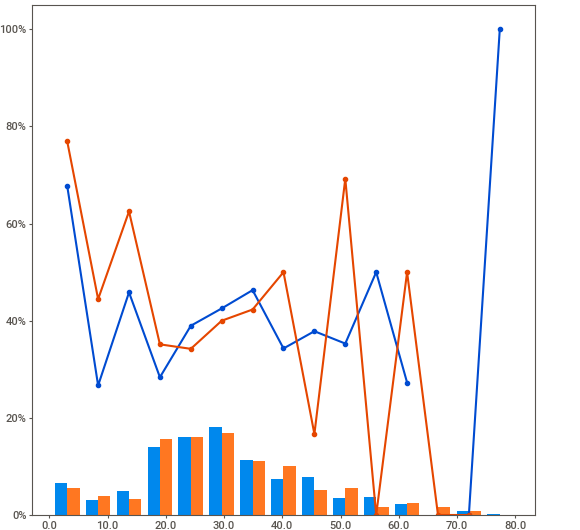
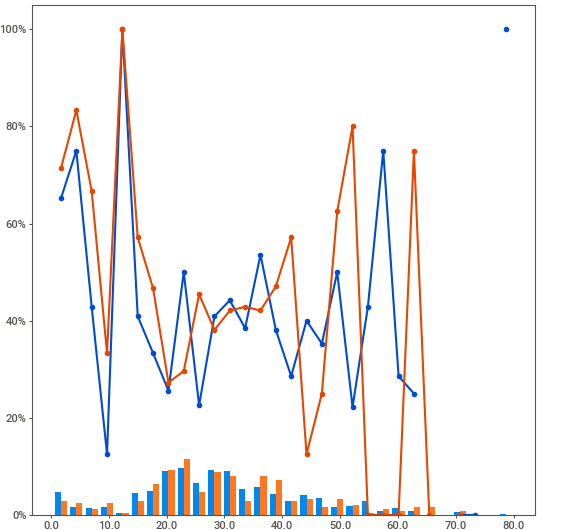
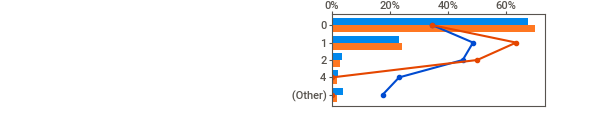
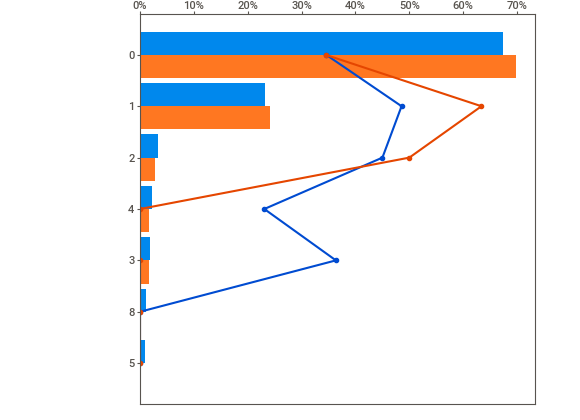
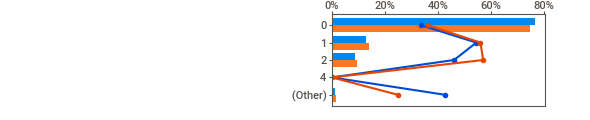
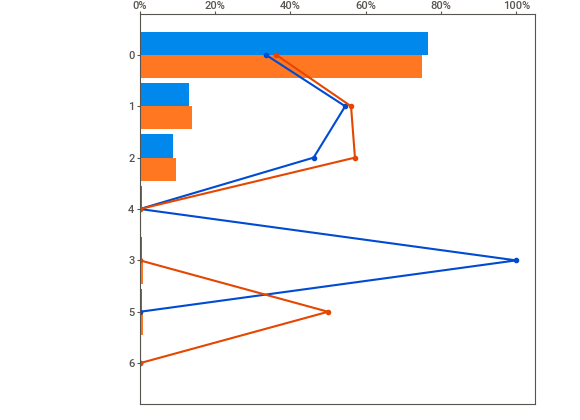
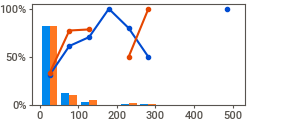
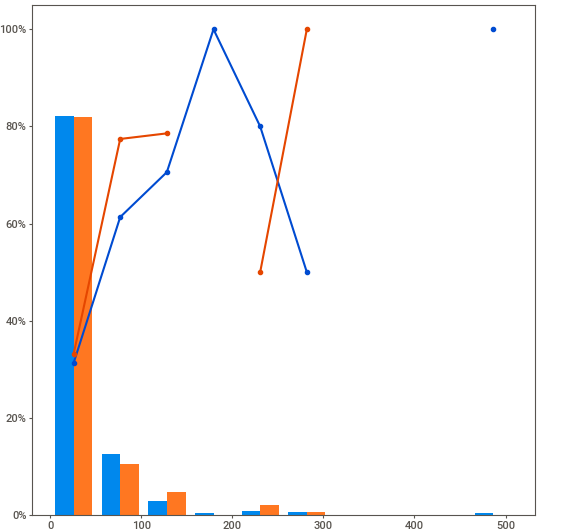
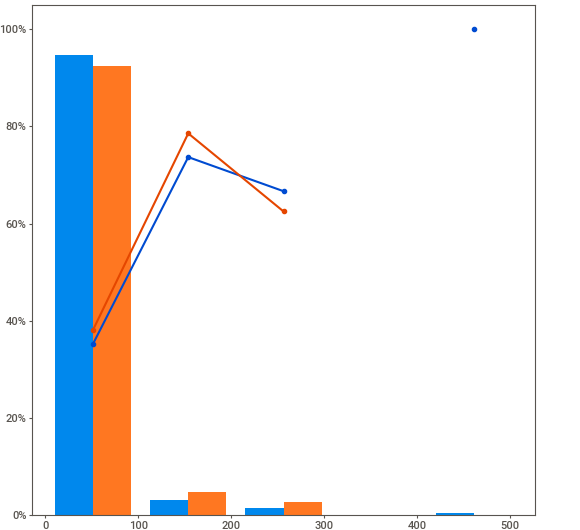
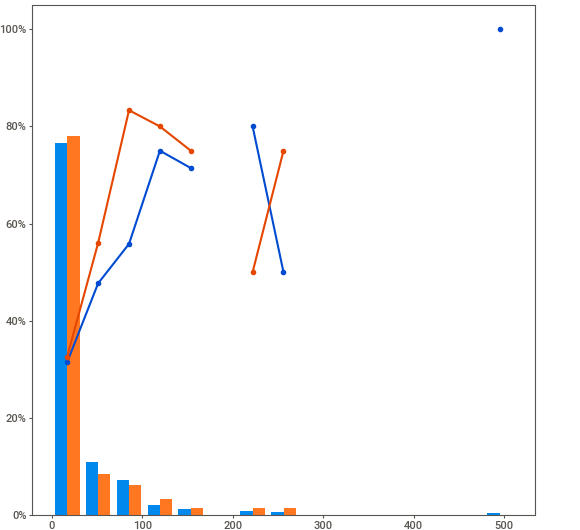
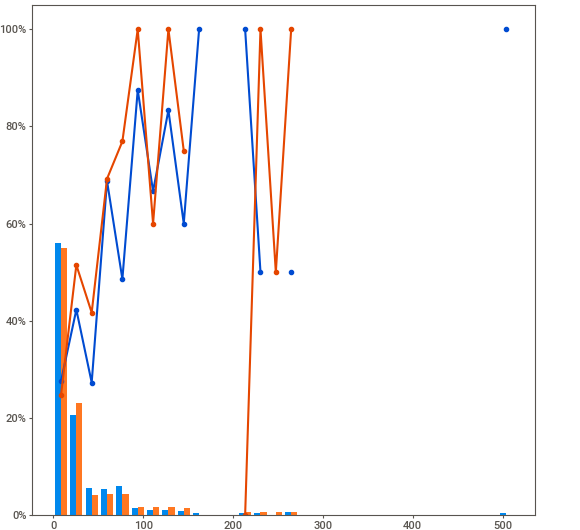
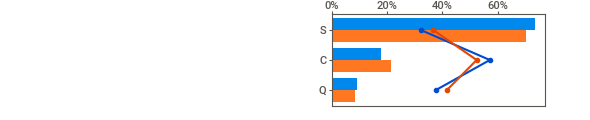
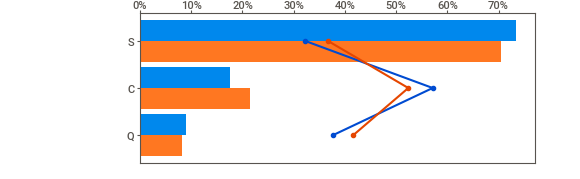
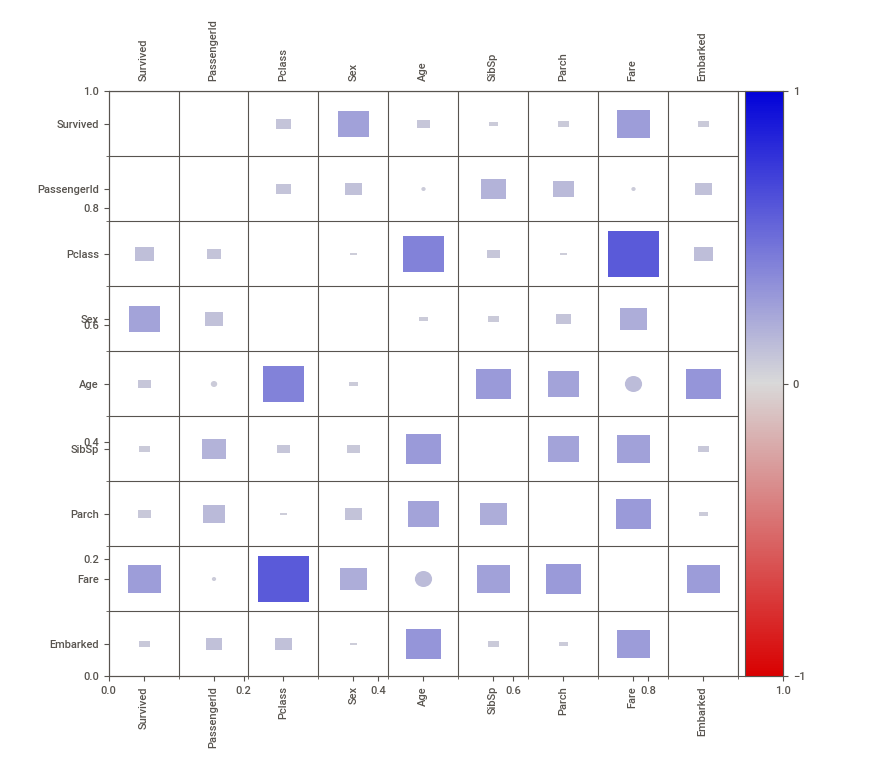
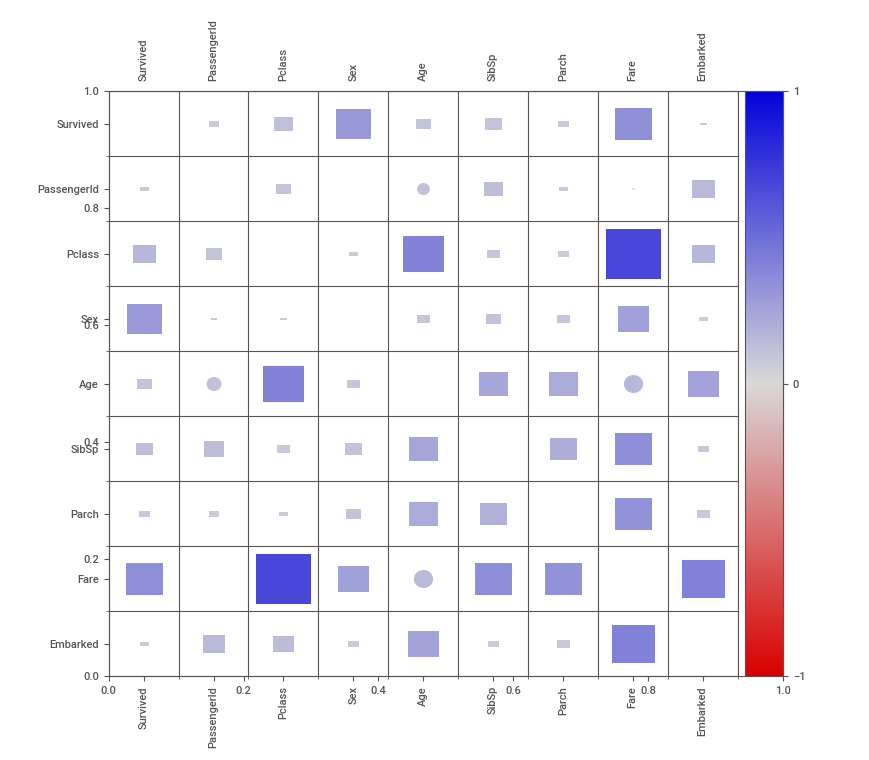

In [91]:
import sweetviz as sv
comparison_report = sv.compare([pd.concat([X_train, y_train], axis = 1),'Train'],
                               [pd.concat([X_test, y_test], axis = 1),'Test'],
                               target_feat='Survived')
comparison_report.show_notebook()

### Cross validation

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


data_raw = pd.read_csv('decision_tree_train.csv')

data = data_raw.copy().drop(columns = 'Cabin')
data['Age'] = data['Age'].fillna(28)
data['Embarked'] = data['Embarked'].fillna('S')

# Creating an instance of our decision tree
tree = DecisionTreeClassifier(max_depth = 4,
                              # random_state = 0,
                              min_samples_leaf = 20,
                              criterion = 'gini')

scores = cross_val_score(tree,
                         data.loc[:, ['Age', 'Fare']],
                         data.Survived,
                         cv=5)

scores

array([0.58100559, 0.73033708, 0.70224719, 0.73595506, 0.7247191 ])

## Sklearn pipelines

In [97]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load the Titanic dataset
train_df = pd.read_csv('decision_tree_train.csv')

# Separate the target variable from the features
X_train = train_df.drop(['Survived'], axis=1)
y_train = train_df['Survived']

# Define the numerical and categorical features
num_features = ['Age', 'Fare']# ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Sex']# ['Pclass', 'Sex', 'Embarked']

# Define the preprocessing steps for numerical and categorical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Combine the numerical and categorical transformers
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

# Fit and transform the training data
X_train_preprocessed = pipeline.fit_transform(X_train)

In [99]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex'])]))])

In [101]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
feature_names

array(['num__Age', 'num__Fare', 'cat__Sex_female', 'cat__Sex_male'],
      dtype=object)

In [103]:
pd.DataFrame(X_train_preprocessed, columns = feature_names)

num__Age  num__Fare  cat__Sex_female  cat__Sex_male
0   -0.565736  -0.502445              0.0            1.0
1    0.663861   0.786845              1.0            0.0
2   -0.258337  -0.488854              1.0            0.0
3    0.433312   0.420730              1.0            0.0
4    0.433312  -0.486337              0.0            1.0
..        ...        ...              ...            ...
886 -0.181487  -0.386671              0.0            1.0
887 -0.796286  -0.044381              1.0            0.0
888 -0.104637  -0.176263              1.0            0.0
889 -0.258337  -0.044381              0.0            1.0
890  0.202762  -0.492378              0.0            1.0

[891 rows x 4 columns]

In [105]:
pd.concat([pd.DataFrame(X_train_preprocessed, columns = feature_names),
           X_train['Sex']], axis = 1)

num__Age  num__Fare  cat__Sex_female  cat__Sex_male     Sex
0   -0.565736  -0.502445              0.0            1.0    male
1    0.663861   0.786845              1.0            0.0  female
2   -0.258337  -0.488854              1.0            0.0  female
3    0.433312   0.420730              1.0            0.0  female
4    0.433312  -0.486337              0.0            1.0    male
..        ...        ...              ...            ...     ...
886 -0.181487  -0.386671              0.0            1.0    male
887 -0.796286  -0.044381              1.0            0.0  female
888 -0.104637  -0.176263              1.0            0.0  female
889 -0.258337  -0.044381              0.0            1.0    male
890  0.202762  -0.492378              0.0            1.0    male

[891 rows x 5 columns]

### Including model and hiperparametrization

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Combine the preprocessing steps and the classifier into a single pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Define the hyperparameter space for grid search
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [20, 30],
    'classifier__min_samples_leaf': [10, 15]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best hyperparameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 20}
Best score:  0.7979473981545415


In [110]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10,
                                        min_samples_split=20))])

In [112]:
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
y_pred = best_estimator.predict(X_train)

In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       549
           1       0.76      0.74      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [116]:
tree_model = best_estimator.get_params()['classifier']
feature_names = grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

In [118]:
feature_names

array(['num__Age', 'num__Fare', 'cat__Sex_female', 'cat__Sex_male'],
      dtype=object)

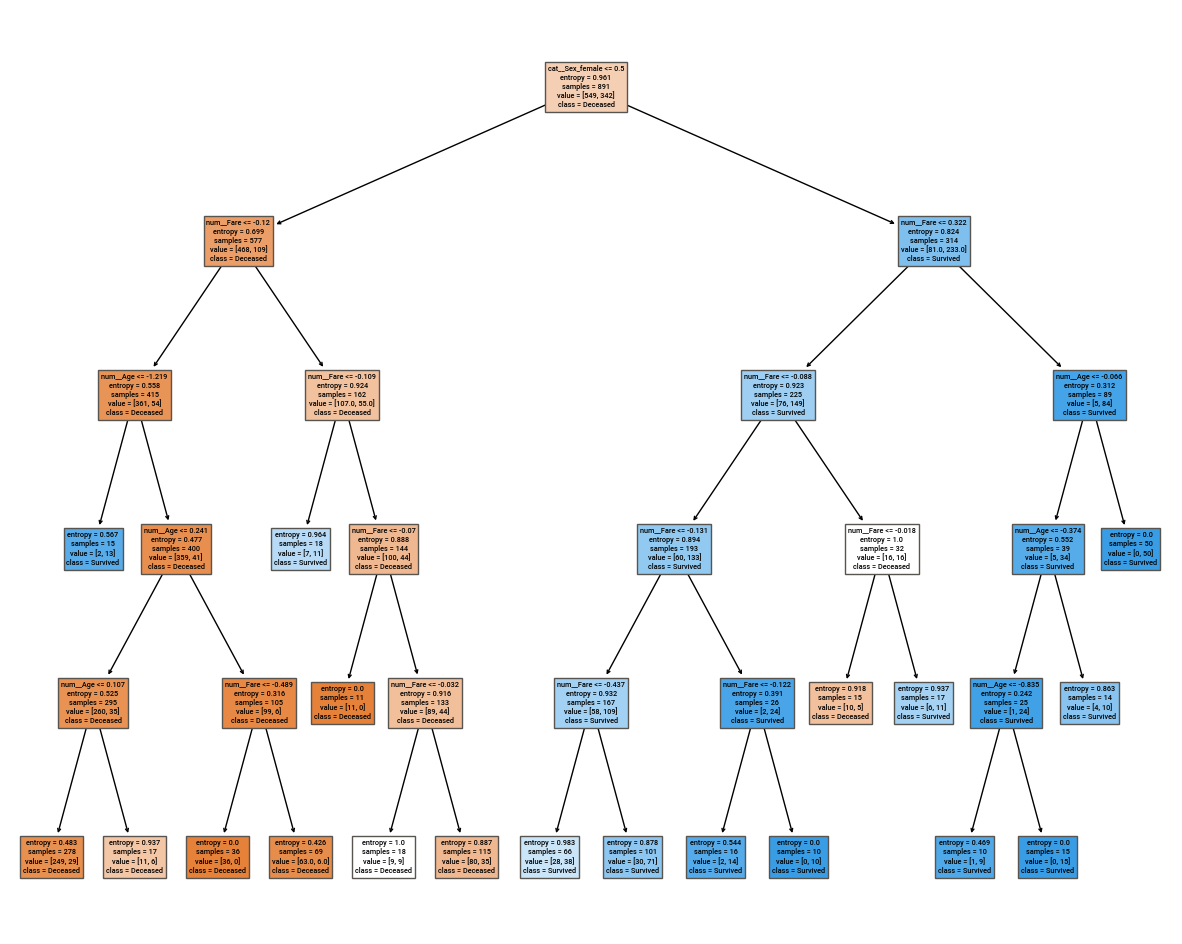

In [120]:
from sklearn.tree import plot_tree

# Creating a plot of our model
plt.subplots(figsize = (15,12))
plot_tree(tree_model,
          feature_names = feature_names,
          class_names = ['Deceased', 'Survived'],
          filled = True)
plt.show()